## Trees from Relate

In [1]:
setwd('~/snap_hap_repHZ/relate/')

library(foreach)
library(tidyverse)
library(data.table)
library(tictoc)
library(patchwork)
library(ape)
library(ggtree)

# source('~/twisst/plot_twisst.R')
source('./_scripts/treeView.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::accumulate() masks foreach::accumulate()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ purrr::when()       masks foreach::when()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘tictoc’


The follo

## Read data

In [2]:
# ## Gene annotations
# gff = fread('~/snap_hap/ref_genome/v3.5/Amajus_v3.5.gff.gz')
# # gff = fread('~/snap_hap/ref_genome/v3.5/Amajus_v3.5_Chr6.gff')
# str(gff)

In [2]:
## Read smoothed weights
chr1 = fread('~/snap_hap_repHZ/twisst/trees_relate/weights/chr1.weights.smooth.csv.gz')
chr2 = fread('~/snap_hap_repHZ/twisst/trees_relate/weights/chr2.weights.smooth.csv.gz')
chr3 = fread('~/snap_hap_repHZ/twisst/trees_relate/weights/chr3.weights.smooth.csv.gz')
chr4 = fread('~/snap_hap_repHZ/twisst/trees_relate/weights/chr4.weights.smooth.csv.gz')
chr5 = fread('~/snap_hap_repHZ/twisst/trees_relate/weights/chr5.weights.smooth.csv.gz')
chr6 = fread('~/snap_hap_repHZ/twisst/trees_relate/weights/chr6.weights.smooth.csv.gz')
chr7 = fread('~/snap_hap_repHZ/twisst/trees_relate/weights/chr7.weights.smooth.csv.gz')
chr8 = fread('~/snap_hap_repHZ/twisst/trees_relate/weights/chr8.weights.smooth.csv.gz')

In [4]:
## Read trees
# tr1 = fread('~/snap_hap_repHZ/relate/newickTrees/rel_chr1-1-71919034.newick.gz', sep='', header=FALSE)
# colnames(tr1) = 'newickTree'
tr2 = fread('~/snap_hap_repHZ/relate/newickTrees/rel_chr2-1-77118269.newick.gz', sep='', header=FALSE)
colnames(tr2) = 'newickTree'
# tr3 = fread('~/snap_hap_repHZ/relate/newickTrees/rel_chr3-1-65231163.newick.gz', sep='', header=FALSE)
# colnames(tr3) = 'newickTree'
# tr4 = fread('~/snap_hap_repHZ/relate/newickTrees/rel_chr4-1-54887108.newick.gz', sep='', header=FALSE)
# colnames(tr4) = 'newickTree'
# tr5 = fread('~/snap_hap_repHZ/relate/newickTrees/rel_chr5-1-71106538.newick.gz', sep='', header=FALSE)
# colnames(tr5) = 'newickTree'
tr6 = fread('~/snap_hap_repHZ/relate/newickTrees/rel_chr6-1-55699338.newick.gz', sep='', header=FALSE)
colnames(tr6) = 'newickTree'
# tr7 = fread('~/snap_hap_repHZ/relate/newickTrees/rel_chr7-1-55564713.newick.gz', sep='', header=FALSE)
# colnames(tr7) = 'newickTree'
# tr8 = fread('~/snap_hap_repHZ/relate/newickTrees/rel_chr8-1-57431585.newick.gz', sep='', header=FALSE)
# colnames(tr8) = 'newickTree'

In [5]:
## combine trees and weights
# dat1 = cbind(chr1, tr1)
dat2 = cbind(chr2, tr2)
# dat3 = cbind(chr3, tr3)
# dat4 = cbind(chr4, tr4)
# dat5 = cbind(chr5, tr5)
dat6 = cbind(chr6, tr6)
# dat7 = cbind(chr7, tr7)
# dat8 = cbind(chr8, tr8)

In [70]:
# dat6 = chr6

In [6]:
str(dat6)

Classes ‘data.table’ and 'data.frame':	550068 obs. of  16 variables:
 $ treeID    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ topo1     : int  3243 3120 3251 3592 3585 3499 3405 2722 3111 3253 ...
 $ topo2     : int  3667 4466 3978 3467 3673 3700 3899 4667 3926 3836 ...
 $ topo3     : int  3090 2414 2771 2941 2742 2801 2696 2611 2963 2911 ...
 $ start     : int  11407 11563 11600 11638 12892 12919 13172 13323 13402 13432 ...
 $ end       : int  11562 11599 11637 12891 12918 13171 13322 13401 13431 13478 ...
 $ total     : int  10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 ...
 $ wt1       : num  0.324 0.312 0.325 0.359 0.358 ...
 $ wt2       : num  0.367 0.447 0.398 0.347 0.367 ...
 $ wt3       : num  0.309 0.241 0.277 0.294 0.274 ...
 $ mid       : num  11484 11581 11618 12264 12905 ...
 $ sites     : int  1 2 1 1 1 2 1 1 1 1 ...
 $ wt1.smooth: num  0.35 0.35 0.35 0.35 0.35 ...
 $ wt2.smooth: num  0.348 0.348 0.348 0.348 0.347 ...
 $ wt3.smooth: num  0.302 0.302 0.302 0.302 0.303

In [6]:
## Tip colors ----
tip.colors = c(rep('magenta',38), rep('yellow3',38), rep('pink3',36), rep('orange',36))
ids = 0:147
tipInfo = data.frame(IDs = ids, tipColors = tip.colors)
# tipInfo
## --

## Finding trees

### Flavia

In [7]:
flavia = c(53368062, 53569435) #chr2

In [8]:
quantile(chr2[start<flavia[2] & end>flavia[1]]$wt2, probs=c(0.5,0.95,0.99))

50%      95%      99% 
0.416900 0.591000 0.647512

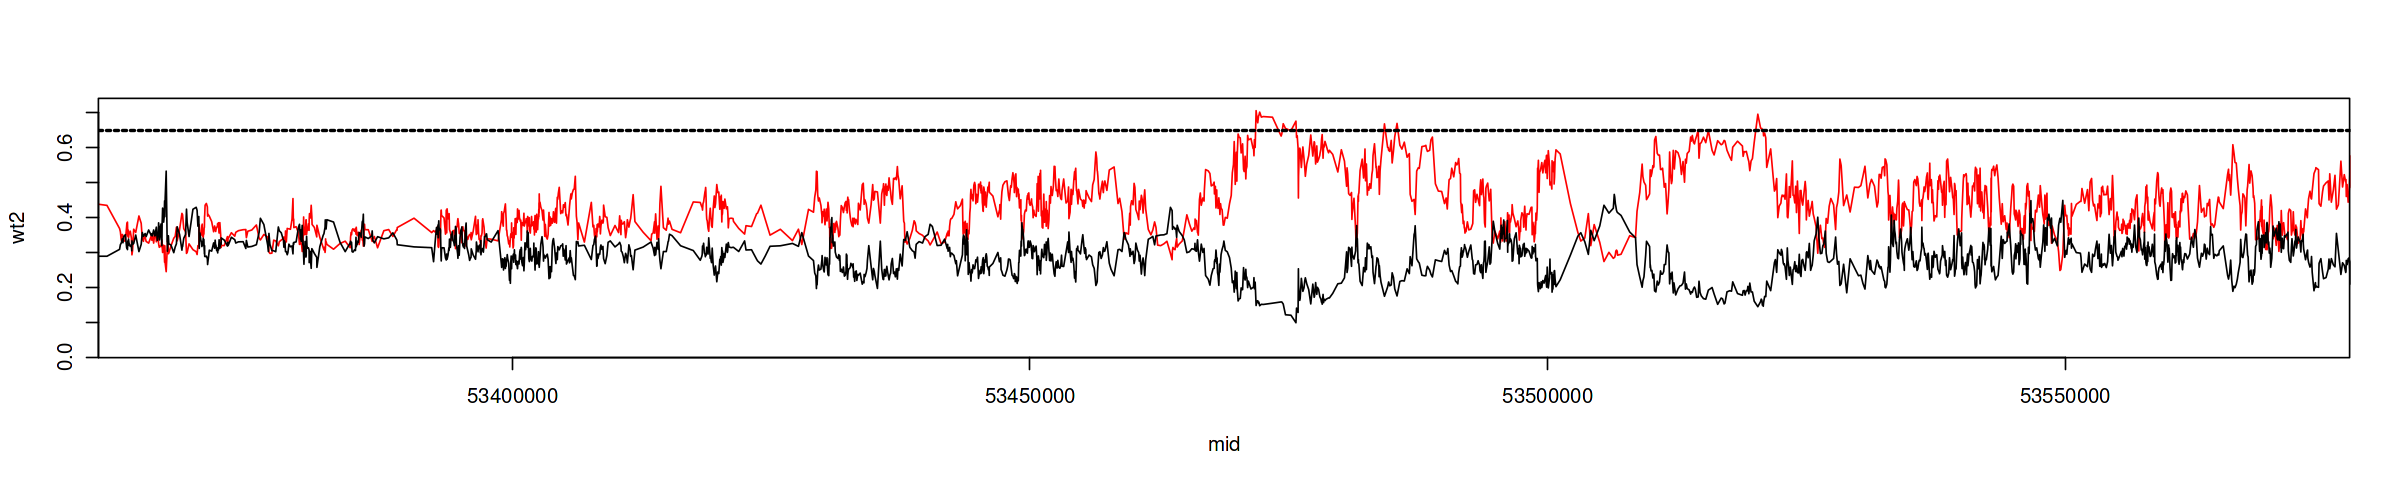

In [9]:
options(repr.plot.width=20, repr.plot.height=4)

plot(wt2~mid, chr2, xlim=flavia, col='red', type='l')
lines(wt1~mid, chr2, xlim=flavia)
abline(h=0.647512, lwd=2, lty=2)

In [34]:
max(chr2$wt2)
which.max(chr2$wt2)
chr2[which.max(chr2$wt2),]

[1] 0.7131

[1] 481319

start,end,mid,span,sites,recRate,total,topo1,topo2,topo3,wt1,wt2,wt3,wt1.smooth,wt2.smooth,wt3.smooth
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
53710273,53710381,53710327,108,2,23.34826,10000,1346,7131,1523,0.1346,0.7131,0.1523,0.2486137,0.4979271,0.2534592


In [35]:
chr2[wt2>0.647512]

start,end,mid,span,sites,recRate,total,topo1,topo2,topo3,wt1,wt2,wt3,wt1.smooth,wt2.smooth,wt3.smooth
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
53471793,53471906,53471850,113,3,13.172340,10000,1486,7054,1460,0.1486,0.7054,0.1460,0.2418057,0.5186579,0.2395364
53471907,53471943,53471925,36,1,13.155878,10000,1610,6856,1534,0.1610,0.6856,0.1534,0.2414663,0.5193364,0.2391973
53471944,53472074,53472009,130,2,13.138678,10000,1621,6709,1670,0.1621,0.6709,0.1670,0.2410888,0.5200928,0.2388184
53472075,53472104,53472090,29,1,12.983725,10000,1546,6911,1543,0.1546,0.6911,0.1543,0.2407274,0.5208189,0.2384538
53472105,53472131,53472118,26,1,11.876392,10000,1581,6918,1501,0.1581,0.6918,0.1501,0.2405995,0.5210762,0.2383244
53472132,53472258,53472195,126,1,9.347808,10000,1479,7013,1508,0.1479,0.7013,0.1508,0.2402542,0.5217719,0.2379739
53472259,53472453,53472356,194,3,9.076783,10000,1519,6871,1610,0.1519,0.6871,0.1610,0.2395339,0.5232280,0.2372380
53472454,53472639,53472546,185,1,8.414193,10000,1515,6886,1599,0.1515,0.6886,0.1599,0.2386857,0.5249514,0.2363629
53472640,53474224,53473432,1584,5,5.902474,10000,1551,6868,1581,0.1551,0.6868,0.1581,0.2348434,0.5328709,0.2322857


### Sulf

In [165]:
sulf = c(38248572, 38450336) #chr4

In [166]:
quantile(chr4[start<sulf[2] & end>sulf[1]]$wt2, probs=c(0.5,0.95,0.99))

50%      95%      99% 
0.334750 0.390675 0.423635

In [181]:
max(chr4$wt2)

[1] 0.6908

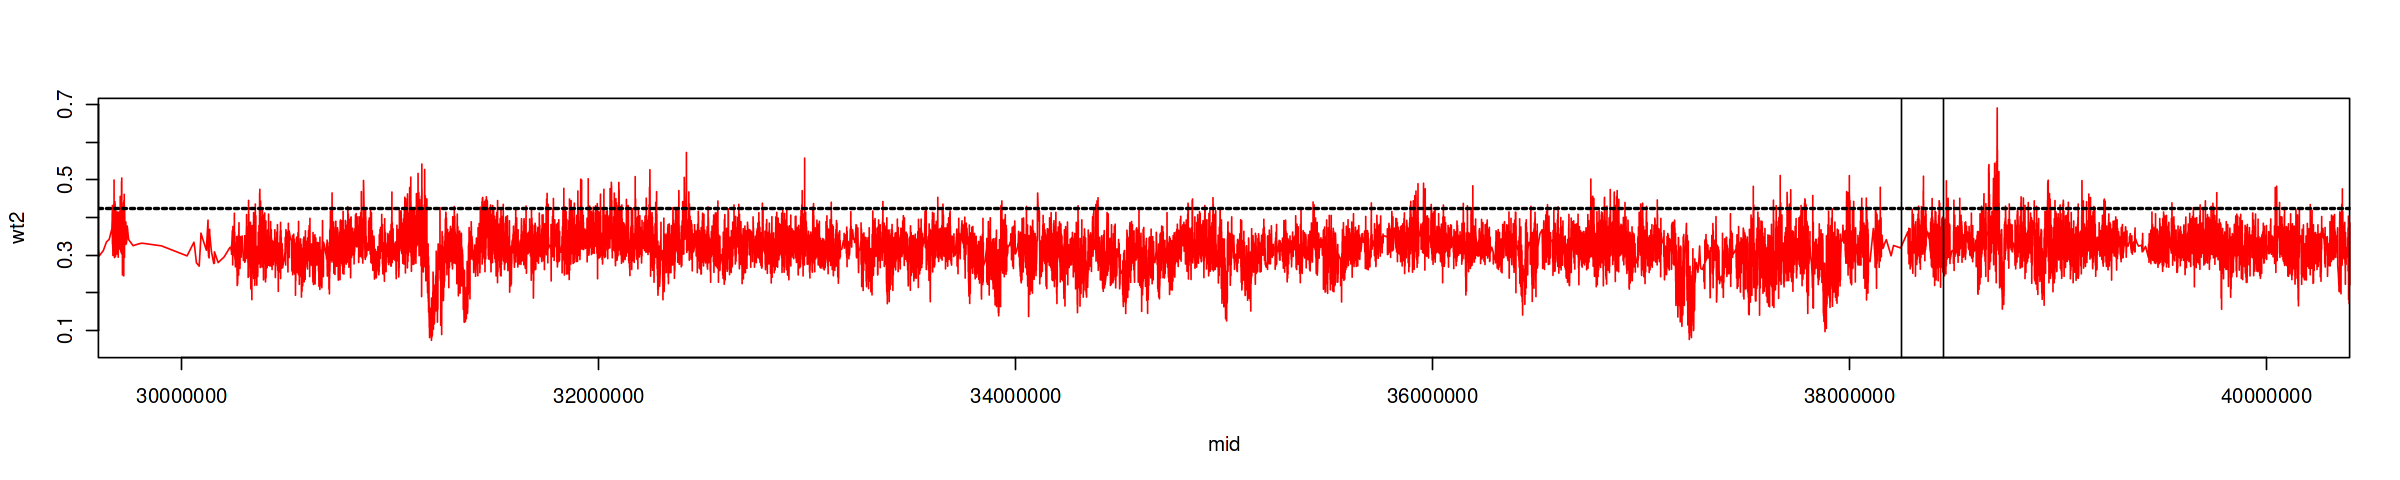

In [183]:
options(repr.plot.width=20, repr.plot.height=4)

plot(wt2~mid, chr4, xlim=c(30e6,40e6), 
     col='red', type='l')
# lines(wt1~mid, chr4, xlim=sulf)
abline(h=0.423635, lwd=2, lty=2)
abline(v=sulf)

In [194]:
max(chr4$wt2)
which.max(chr4$wt2)
chr4[(which.max(chr4$wt2)-15):(which.max(chr4$wt2)+15), ]

[1] 0.6908

[1] 321741

start,end,mid,span,sites,recRate,total,topo1,topo2,topo3,wt1,wt2,wt3,wt1.smooth,wt2.smooth,wt3.smooth
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
38708803,38708821,38708812,18,6,37.42787,10000,2849,5117,2034,0.2849,0.5117,0.2034,0.2472472,0.4554422,0.2973107
38708822,38708878,38708850,56,11,37.47683,10000,2628,5499,1873,0.2628,0.5499,0.1873,0.2472587,0.4555982,0.2971431
38708879,38708912,38708896,33,6,38.51100,10000,2114,6178,1708,0.2114,0.6178,0.1708,0.2472764,0.4557779,0.2969456
38708913,38709028,38708970,115,1,39.17401,10000,1839,6596,1565,0.1839,0.6596,0.1565,0.2473155,0.4560565,0.2966280
38709029,38709032,38709030,3,1,39.17167,10000,2043,6422,1535,0.2043,0.6422,0.1535,0.2473560,0.4562624,0.2963816
38709033,38709064,38709048,31,3,39.16952,10000,1997,6453,1550,0.1997,0.6453,0.1550,0.2473699,0.4563211,0.2963090
38709065,38709102,38709084,37,3,39.16195,10000,1909,6590,1501,0.1909,0.6590,0.1501,0.2473990,0.4564310,0.2961700
38709103,38709174,38709138,71,13,32.02937,10000,1868,6478,1654,0.1868,0.6478,0.1654,0.2474511,0.4565919,0.2959570
38709175,38709191,38709183,16,5,24.56919,10000,2182,6113,1705,0.2182,0.6113,0.1705,0.2474990,0.4567113,0.2957897


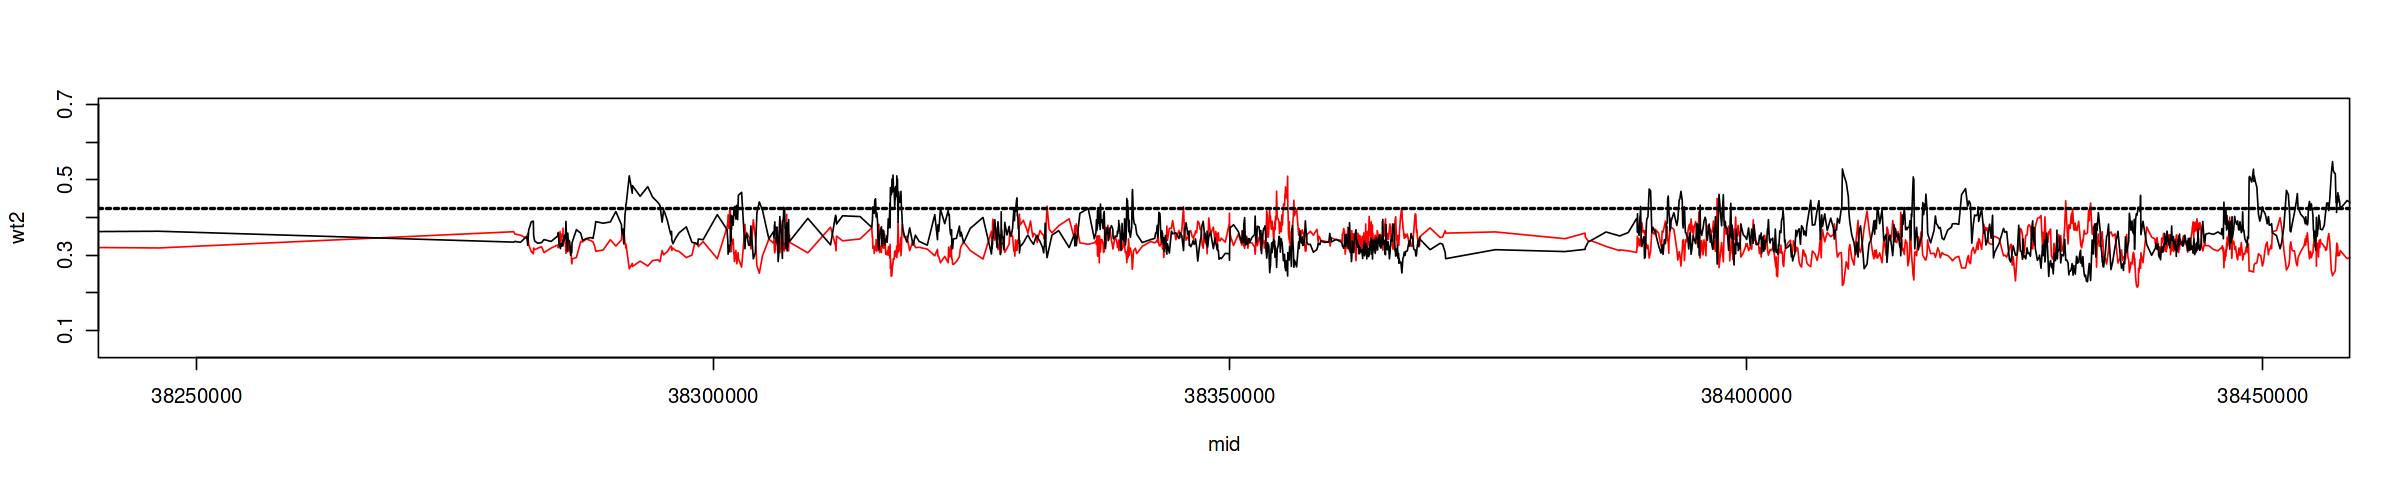

In [167]:
options(repr.plot.width=20, repr.plot.height=4)

plot(wt2~mid, chr4, xlim=sulf, col='red', type='l')
lines(wt1~mid, chr4, xlim=sulf)
abline(h=0.423635, lwd=2, lty=2)

In [168]:
## Maximum topology weight around Rubia
sulfPos = chr4[start>sulf[1] & start<sulf[2]]
max(sulfPos$wt2)
which.max(sulfPos$wt2)
sulfPos[(which.max(sulfPos$wt2)-3):(which.max(sulfPos$wt2)+3), ]

[1] 0.5095

[1] 659

start,end,mid,span,sites,recRate,total,topo1,topo2,topo3,wt1,wt2,wt3,wt1.smooth,wt2.smooth,wt3.smooth
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
38355430,38355452,38355441,22,2,56.16625,10000,2671,4661,2668,0.2671,0.4661,0.2668,0.3275707,0.3634039,0.3090254
38355453,38355515,38355484,62,7,61.73407,10000,2854,4623,2523,0.2854,0.4623,0.2523,0.3275366,0.3633102,0.3091532
38355516,38355600,38355558,84,2,70.37700,10000,2811,4494,2695,0.2811,0.4494,0.2695,0.3274790,0.3631427,0.3093783
38355601,38355626,38355614,25,4,70.37700,10000,2447,5095,2458,0.2447,0.5095,0.2458,0.3274368,0.3630122,0.3095510
38355627,38355639,38355633,12,1,70.37700,10000,3066,4207,2727,0.3066,0.4207,0.2727,0.3274222,0.3629654,0.3096124
38355640,38355683,38355662,43,3,70.37700,10000,2924,4091,2985,0.2924,0.4091,0.2985,0.3274010,0.3628962,0.3097028
38355684,38355719,38355702,35,6,70.37700,10000,3042,3536,3422,0.3042,0.3536,0.3422,0.3273716,0.3627974,0.3098309


### Rubia

In [146]:
rubia = c(6169966, 6372151) #chr5

In [147]:
quantile(chr5[start<rubia[2] & end>rubia[1]]$wt2, probs=c(0.5,0.95,0.99))

50%     95%     99% 
0.34880 0.44625 0.48790

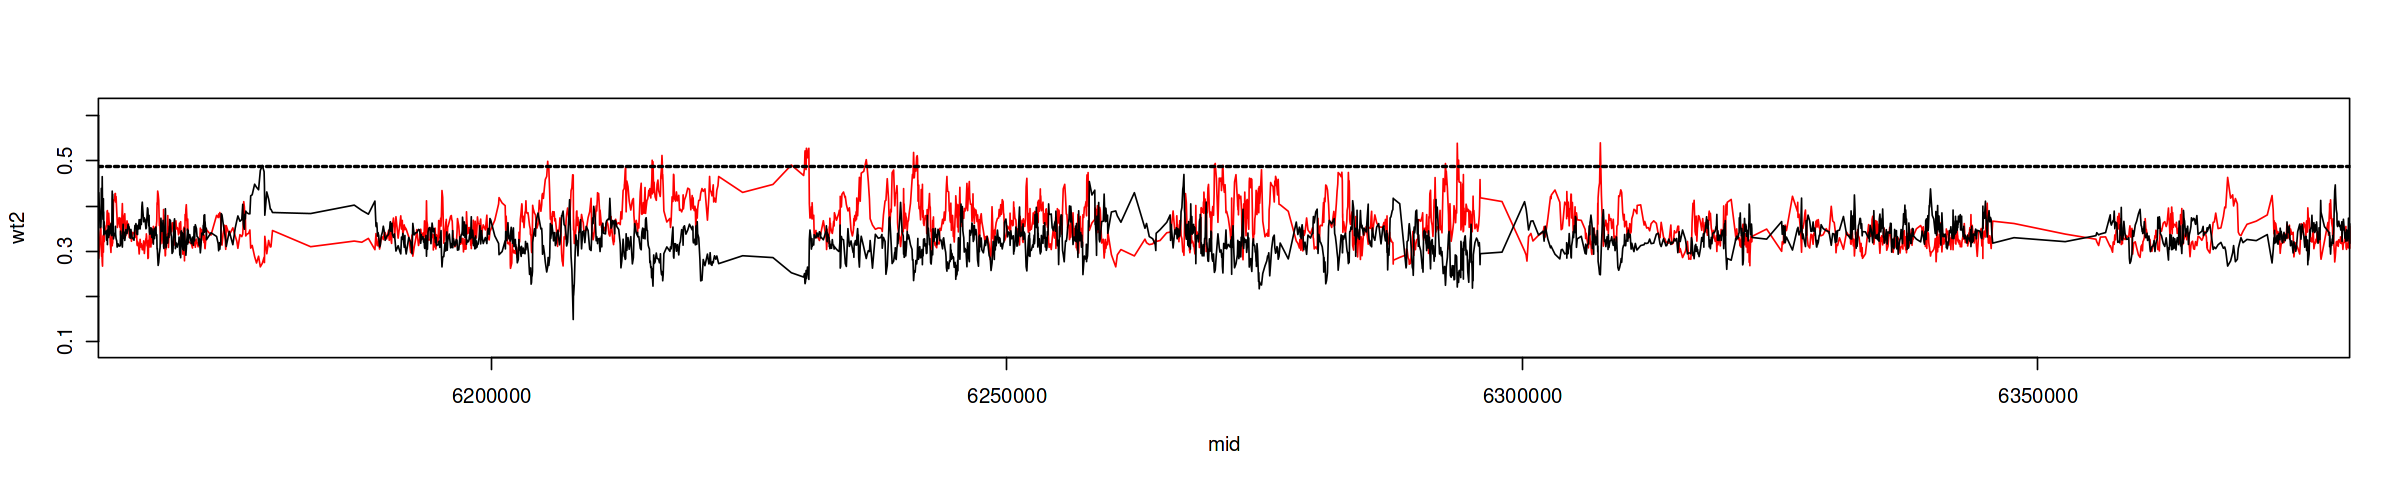

In [148]:
options(repr.plot.width=20, repr.plot.height=4)

plot(wt2~mid, chr5, xlim=rubia, col='red', type='l')
lines(wt1~mid, chr5, xlim=rubia)
abline(h=0.4879, lwd=2, lty=2)

In [164]:
## Maximum topology weight around Rubia
rubiaPos = chr5[start>rubia[1] & start<rubia[2]]
max(rubiaPos$wt2)
which.max(rubiaPos$wt2)
rubiaPos[(which.max(rubiaPos$wt2)-3):(which.max(rubiaPos$wt2)+3), ]

[1] 0.5402

[1] 1789

start,end,mid,span,sites,recRate,total,topo1,topo2,topo3,wt1,wt2,wt3,wt1.smooth,wt2.smooth,wt3.smooth
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6307342,6307345,6307344,3,1,37.53610,10000,2775,4177,3048,0.2775,0.4177,0.3048,0.3179380,0.3637605,0.3183016
6307346,6307475,6307410,129,2,34.52121,10000,2658,4396,2946,0.2658,0.4396,0.2946,0.3180086,0.3636461,0.3183452
6307476,6307502,6307489,26,2,32.89589,10000,2483,4513,3004,0.2483,0.4513,0.3004,0.3180895,0.3635113,0.3183993
6307503,6307622,6307562,119,1,32.84619,10000,2474,5402,2124,0.2474,0.5402,0.2124,0.3181632,0.3633841,0.3184527
6307623,6307712,6307668,89,5,32.84619,10000,3140,4242,2618,0.3140,0.4242,0.2618,0.3182657,0.3632000,0.3185342
6307713,6307844,6307778,131,14,32.84619,10000,3737,3532,2731,0.3737,0.3532,0.2731,0.3183709,0.3630018,0.3186273
6307845,6307864,6307854,19,2,32.84619,10000,3917,3110,2973,0.3917,0.3110,0.2973,0.3184410,0.3628639,0.3186951


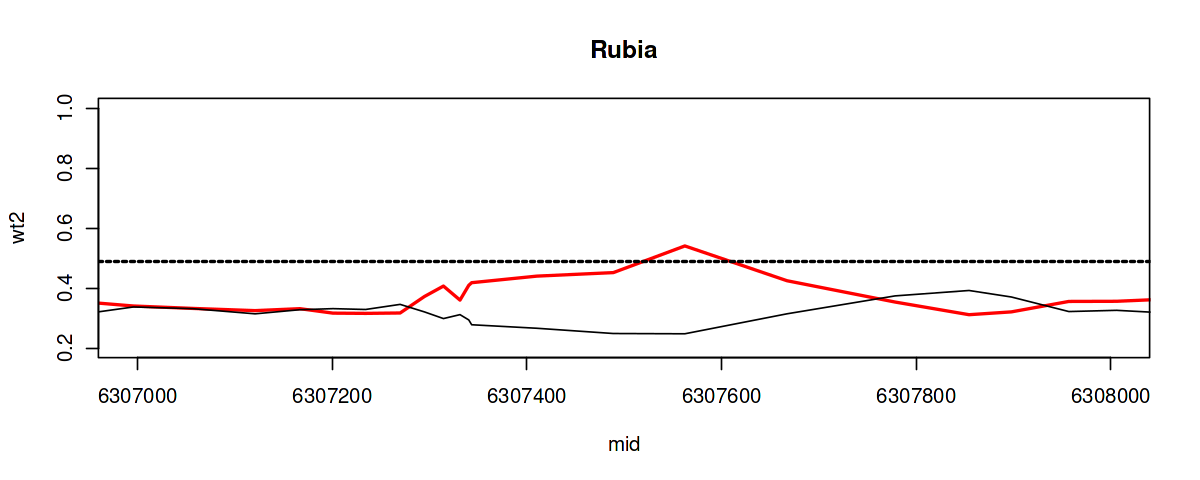

In [163]:
options(repr.plot.width=10, repr.plot.height=4)
plot(wt2~mid, rubiaPos, xlim=c(6307000, 6308000), col='red', type='l', ylim=c(0.2,1), lwd=2, main='Rubia')
lines(wt1~mid, rubiaPos)
abline(h=0.4879, lwd=2, lty=2)

### Rosel

In [10]:
rosel = c(52789323, 53162505) #chr6

In [11]:
quantile(chr6[start<rosel[2] & end>rosel[1]]$wt2, probs=c(0.5,0.95,0.99))

50%      95%      99% 
0.407300 0.656575 0.772570

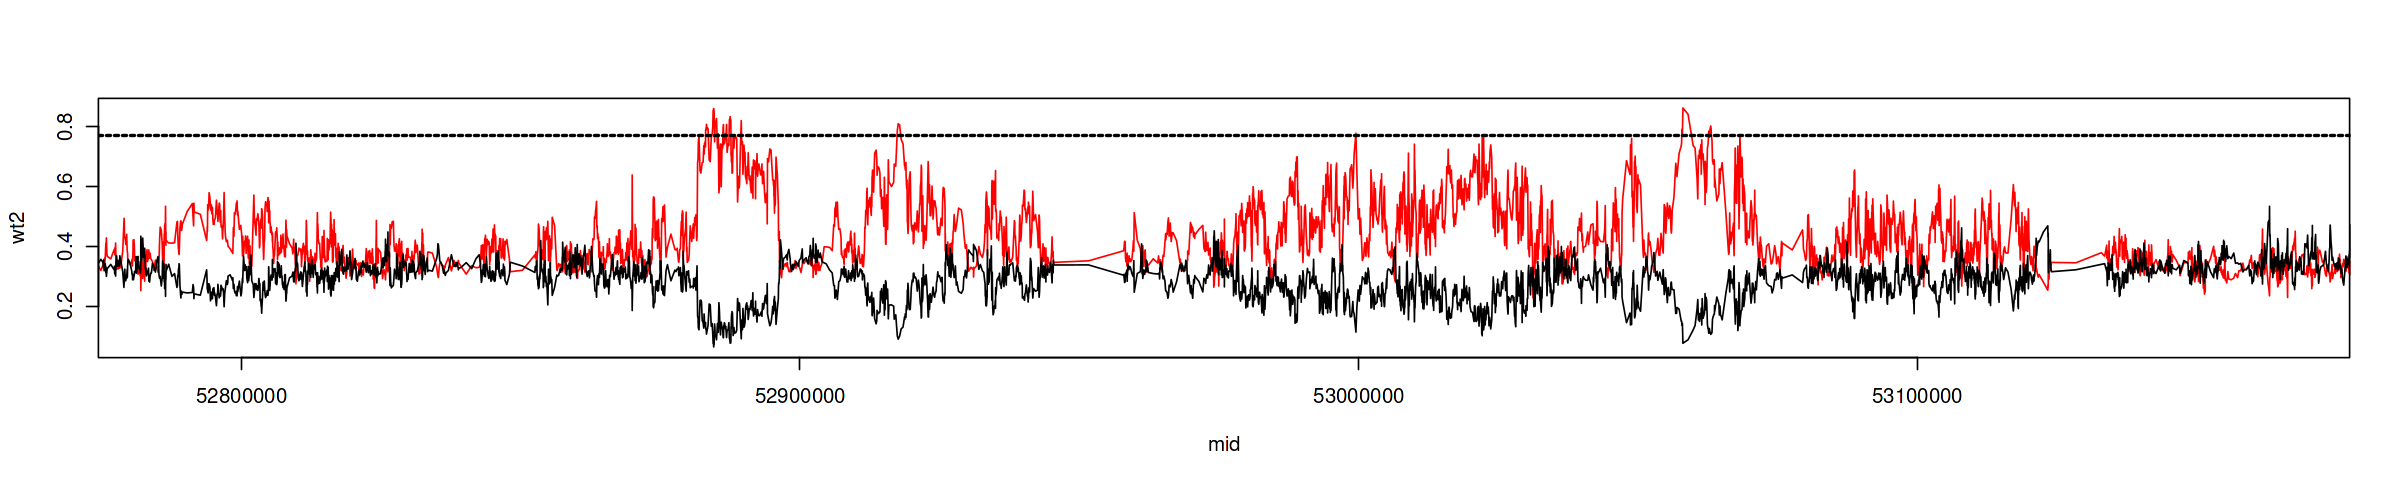

In [12]:
options(repr.plot.width=20, repr.plot.height=4)

plot(wt2~mid, chr6, xlim=rosel, col='red', type='l')
lines(wt1~mid, chr6, xlim=rosel)
abline(h=0.77257, lwd=2, lty=2)

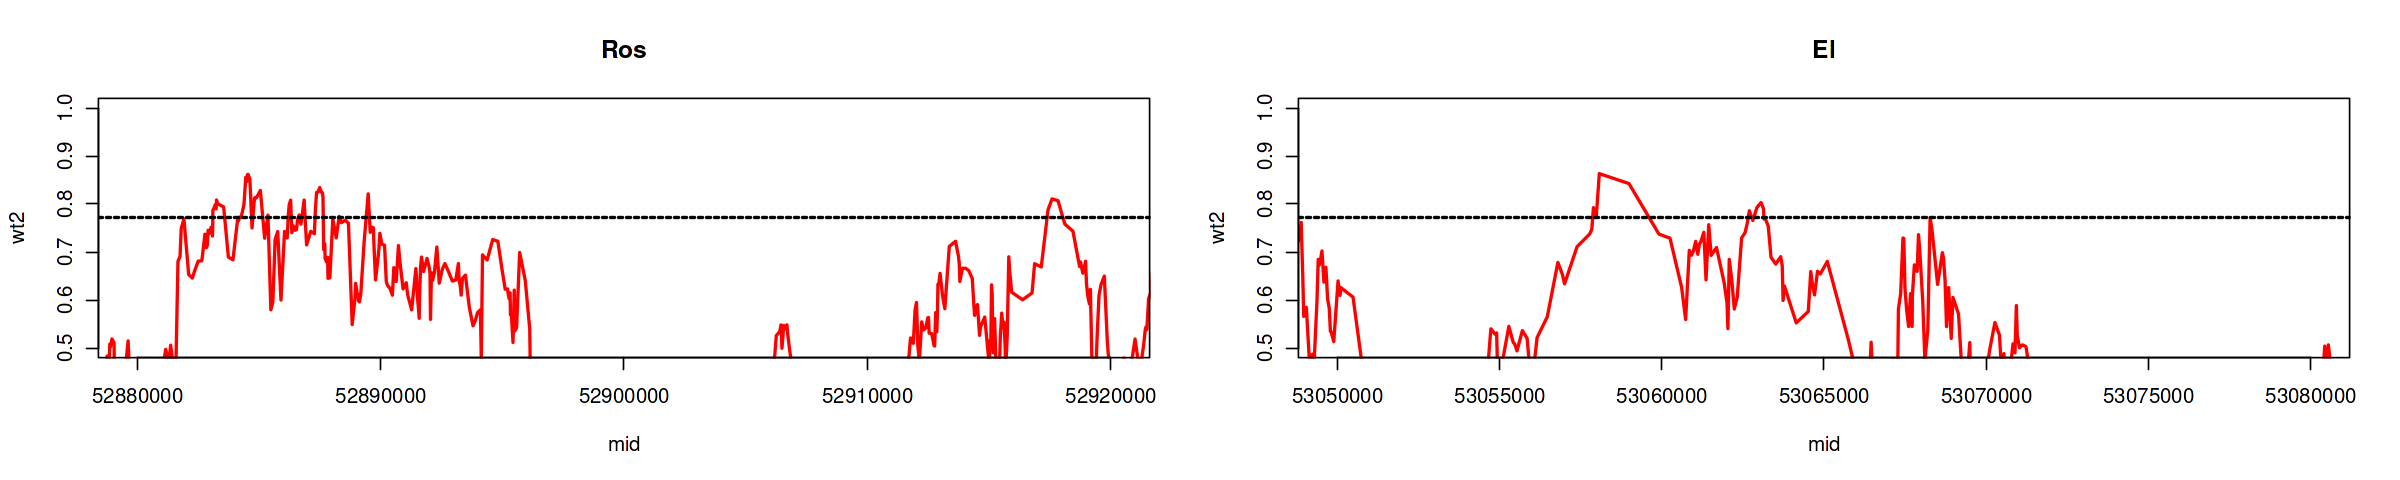

In [13]:
options(repr.plot.width=20, repr.plot.height=4)
par(mfrow=c(1,2))

## Ros
plot(wt2~mid, chr6, xlim=c(52880000, 52920000), col='red', type='l', ylim=c(0.5,1), lwd=2, main='Ros')
abline(h=0.77257, lwd=2, lty=2)

## El
plot(wt2~mid, chr6, xlim=c(53050000, 53080000), col='red', type='l', ylim=c(0.5,1), lwd=2, main='El')
abline(h=0.77257, lwd=2, lty=2)

In [14]:
## Maximum topology weight for whole RosEl
max(chr6$wt2)
which.max(chr6$wt2)
chr6[which.max(chr6$wt2), ]

[1] 0.8633

[1] 516144

treeID,topo1,topo2,topo3,start,end,total,wt1,wt2,wt3,mid,sites,wt1.smooth,wt2.smooth,wt3.smooth
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
516144,761,8633,606,53058053,53058097,10000,0.0761,0.8633,0.0606,53058075,4,0.2132687,0.597996,0.1887353


In [15]:
## Maximum topology weight around Ros1
ros1 = dat6[start>52.6e6 & start<53.4e6]
max(ros1$wt2)
which.max(ros1$wt2)
ros1[which.max(ros1$wt2), -16]

[1] 0.8633

[1] 6203

treeID,topo1,topo2,topo3,start,end,total,wt1,wt2,wt3,mid,sites,wt1.smooth,wt2.smooth,wt3.smooth
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
516144,761,8633,606,53058053,53058097,10000,0.0761,0.8633,0.0606,53058075,4,0.2132687,0.597996,0.1887353


In [16]:
ros1[treeID %in% 513855:513861,-16]

treeID,topo1,topo2,topo3,start,end,total,wt1,wt2,wt3,mid,sites,wt1.smooth,wt2.smooth,wt3.smooth
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
513855,751,8557,692,52884444,52884470,10000,0.0751,0.8557,0.0692,52884457,2,0.1684181,0.6744234,0.1571585
513856,811,8465,724,52884471,52884507,10000,0.0811,0.8465,0.0724,52884489,1,0.1680954,0.6751202,0.1567844
513857,733,8613,654,52884508,52884547,10000,0.0733,0.8613,0.0654,52884528,2,0.1677126,0.6759475,0.1563399
513858,639,8617,744,52884548,52884558,10000,0.0639,0.8617,0.0744,52884553,1,0.1674623,0.6764888,0.1560489
513859,707,8585,708,52884559,52884580,10000,0.0707,0.8585,0.0708,52884570,1,0.1673017,0.6768362,0.1558621
513860,710,8530,760,52884581,52884666,10000,0.0710,0.8530,0.0760,52884624,1,0.1667843,0.6779568,0.1552589
513861,1405,7502,1093,52884667,52884761,10000,0.1405,0.7502,0.1093,52884714,5,0.1659450,0.6797782,0.1542769


## Plot +/- 3 trees around highest Tc weights

### Flavia

In [171]:
source('./_scripts/treeView.R')
geneName = 'flavia' 

PATH_TO_RELATE = '~/_softwares/relate_v1.2.2'
filename_haps = './Chr2/Chr2.haps.gz'
filename_sample = './Chr2/Chr2.sample'
filename_poplabels = './AvePla.MY.n74.poplabels'
filename_anc = './Chr2/rel_chr2_joint.anc.gz'
filename_mut = './Chr2/rel_chr2_joint.mut.gz'
    
years_per_gen = 3
snpPos = c(53652042, 53652180, 53710256, 53710327, 53712795, 53712984, 53714175)

flaviaList = list()
for (snp in snpPos){
    cat(snp, '\n')
    filename_plot = paste('./treeViews/chr2_',geneName,'/chr2_',snp,'_',geneName, sep='')
    plt = drawTree(PATH_TO_RELATE, filename_haps, filename_sample, filename_anc, filename_mut, 
                   filename_poplabels, years_per_gen, snp, filename_plot, geneName,
                   makeFiles = FALSE)

    flaviaList[[which(snpPos == snp)]] = plt
}

53652042 
53652180 
53710256 
53710327 
53712795 
53712984 
53714175 


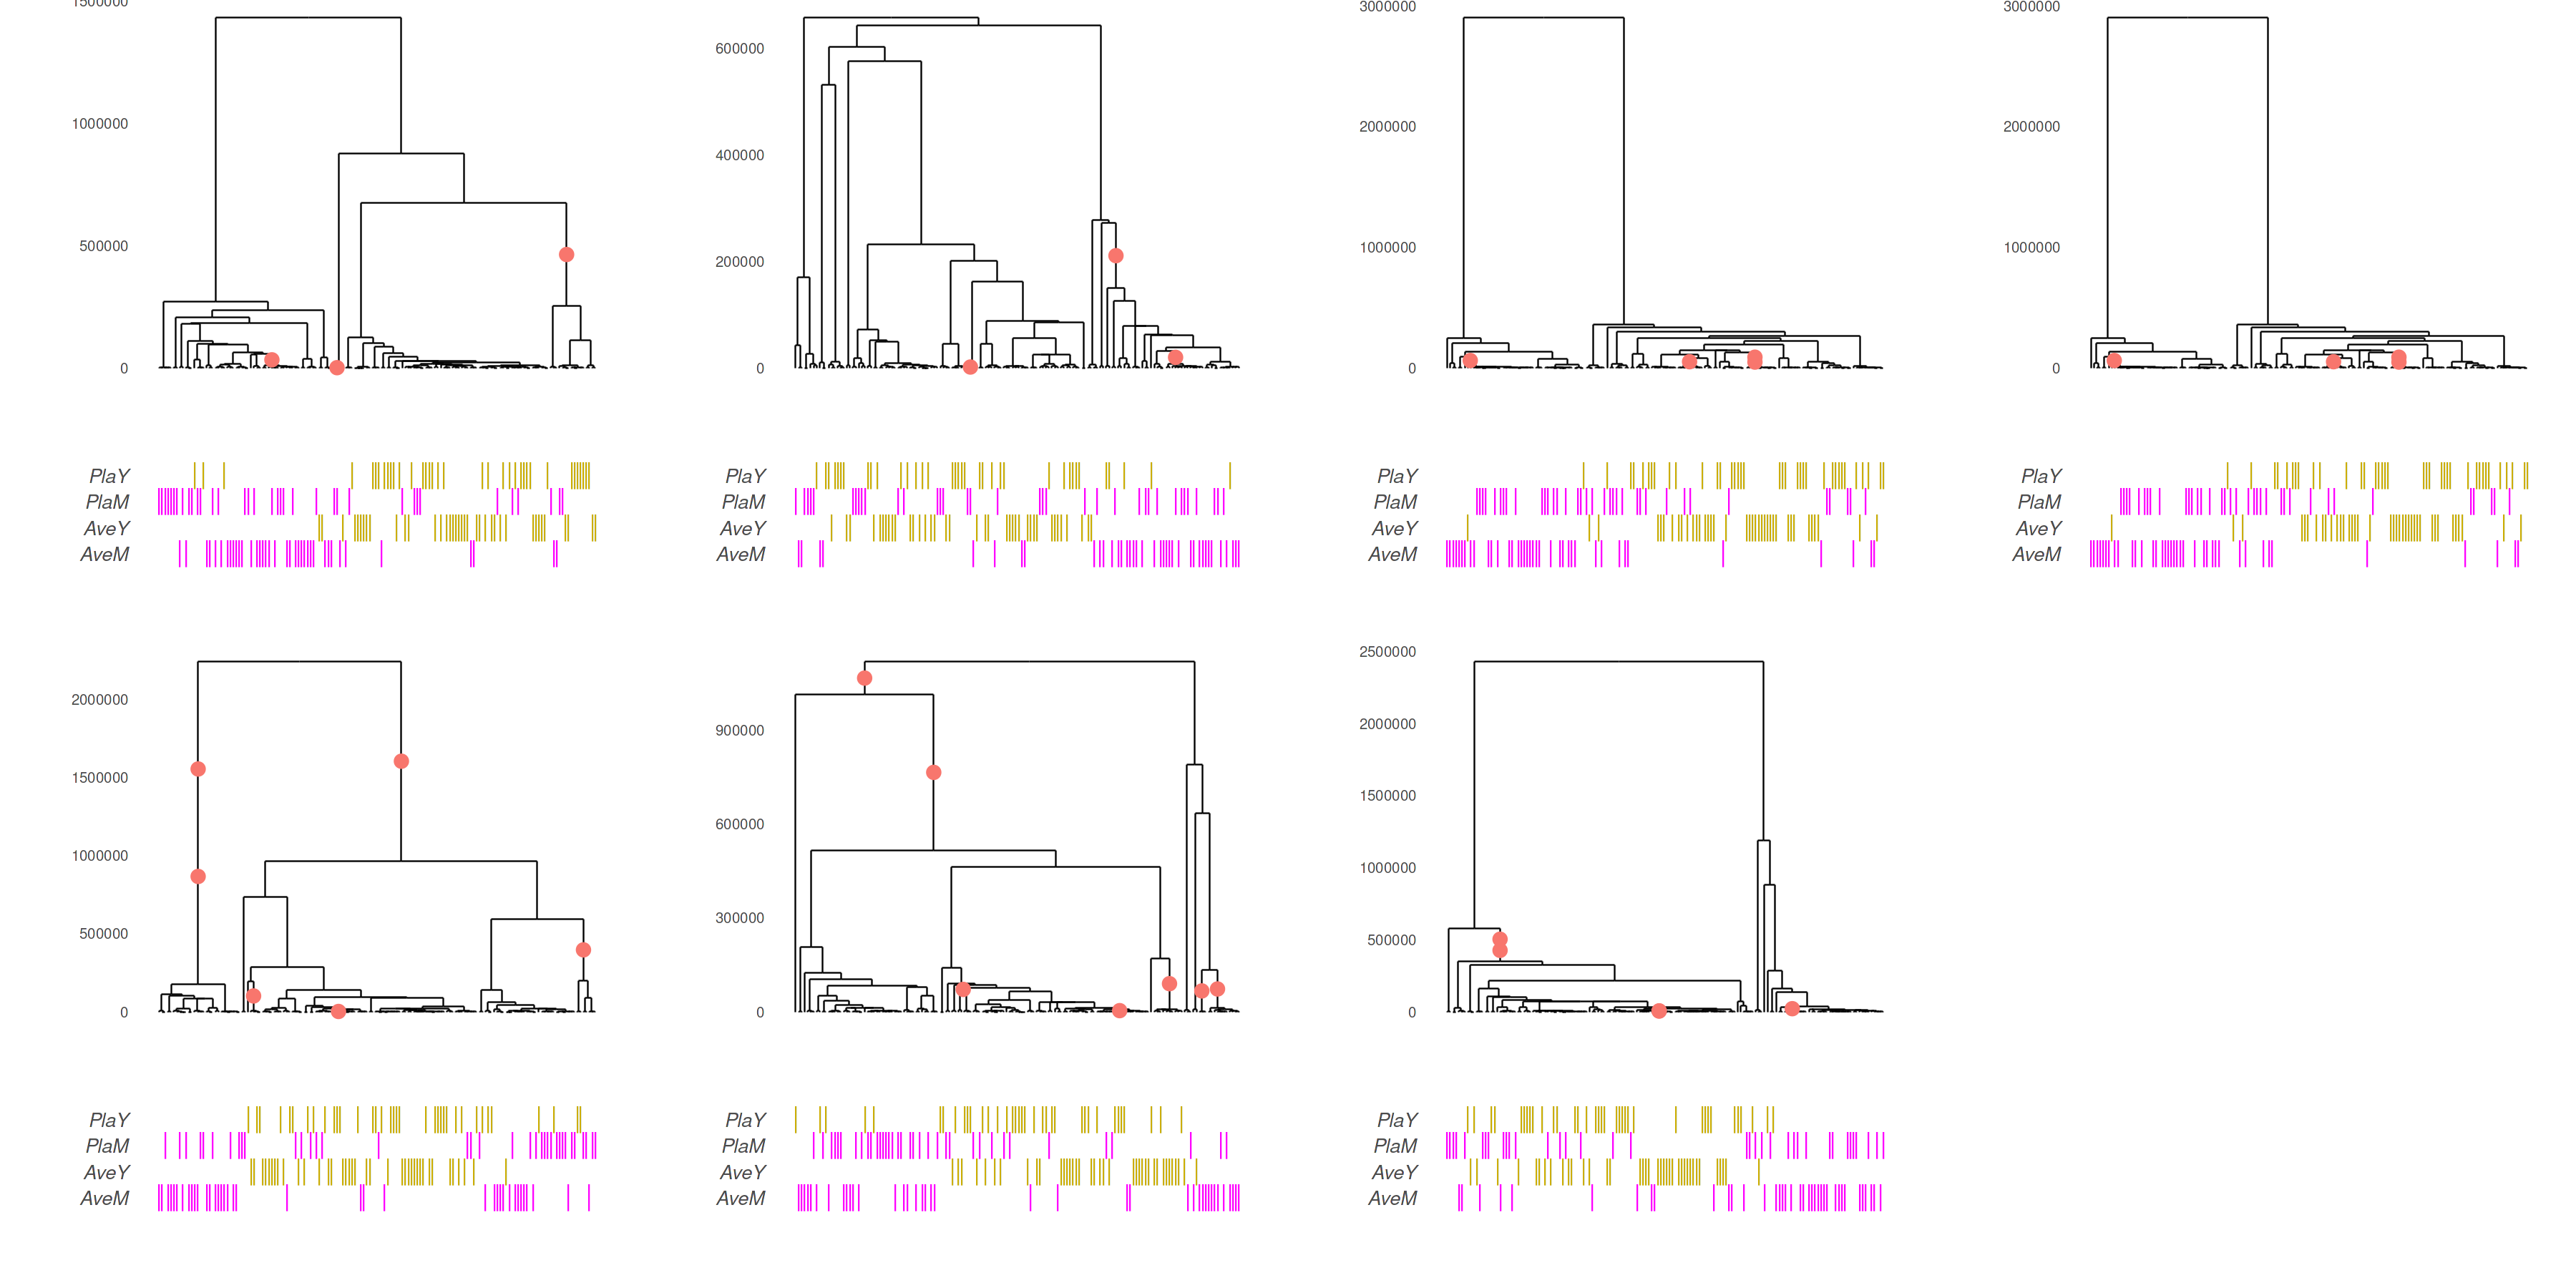

In [172]:
options(repr.plot.width=30, repr.plot.height=15)
pltList = flaviaList
plot_grid(pltList[[1]], pltList[[2]], pltList[[3]], pltList[[4]], pltList[[5]], pltList[[6]], pltList[[7]], nrow=2)

### Sulf

In [173]:
source('./_scripts/treeView.R')
geneName = 'sulf' 

PATH_TO_RELATE = '~/_softwares/relate_v1.2.2'
filename_haps = './Chr4/Chr4.haps.gz'
filename_sample = './Chr4/Chr4.sample'
filename_poplabels = './AvePla.MY.n74.poplabels'
filename_anc = './Chr4/rel_chr4_joint.anc.gz'
filename_mut = './Chr4/rel_chr4_joint.mut.gz'
    
years_per_gen = 3
snpPos = c(38355441, 38355484, 38355558, 38355614, 38355633, 38355662, 38355702)

sulfList = list()
for (snp in snpPos){
    cat(snp, '\n')
    filename_plot = paste('./treeViews/chr4_',geneName,'/chr4_',snp,'_',geneName, sep='')
    plt = drawTree(PATH_TO_RELATE, filename_haps, filename_sample, filename_anc, filename_mut, 
                   filename_poplabels, years_per_gen, snp, filename_plot, geneName,
                   makeFiles = FALSE)

    sulfList[[which(snpPos == snp)]] = plt
}

38355441 
38355484 
38355558 
38355614 
38355633 
38355662 
38355702 


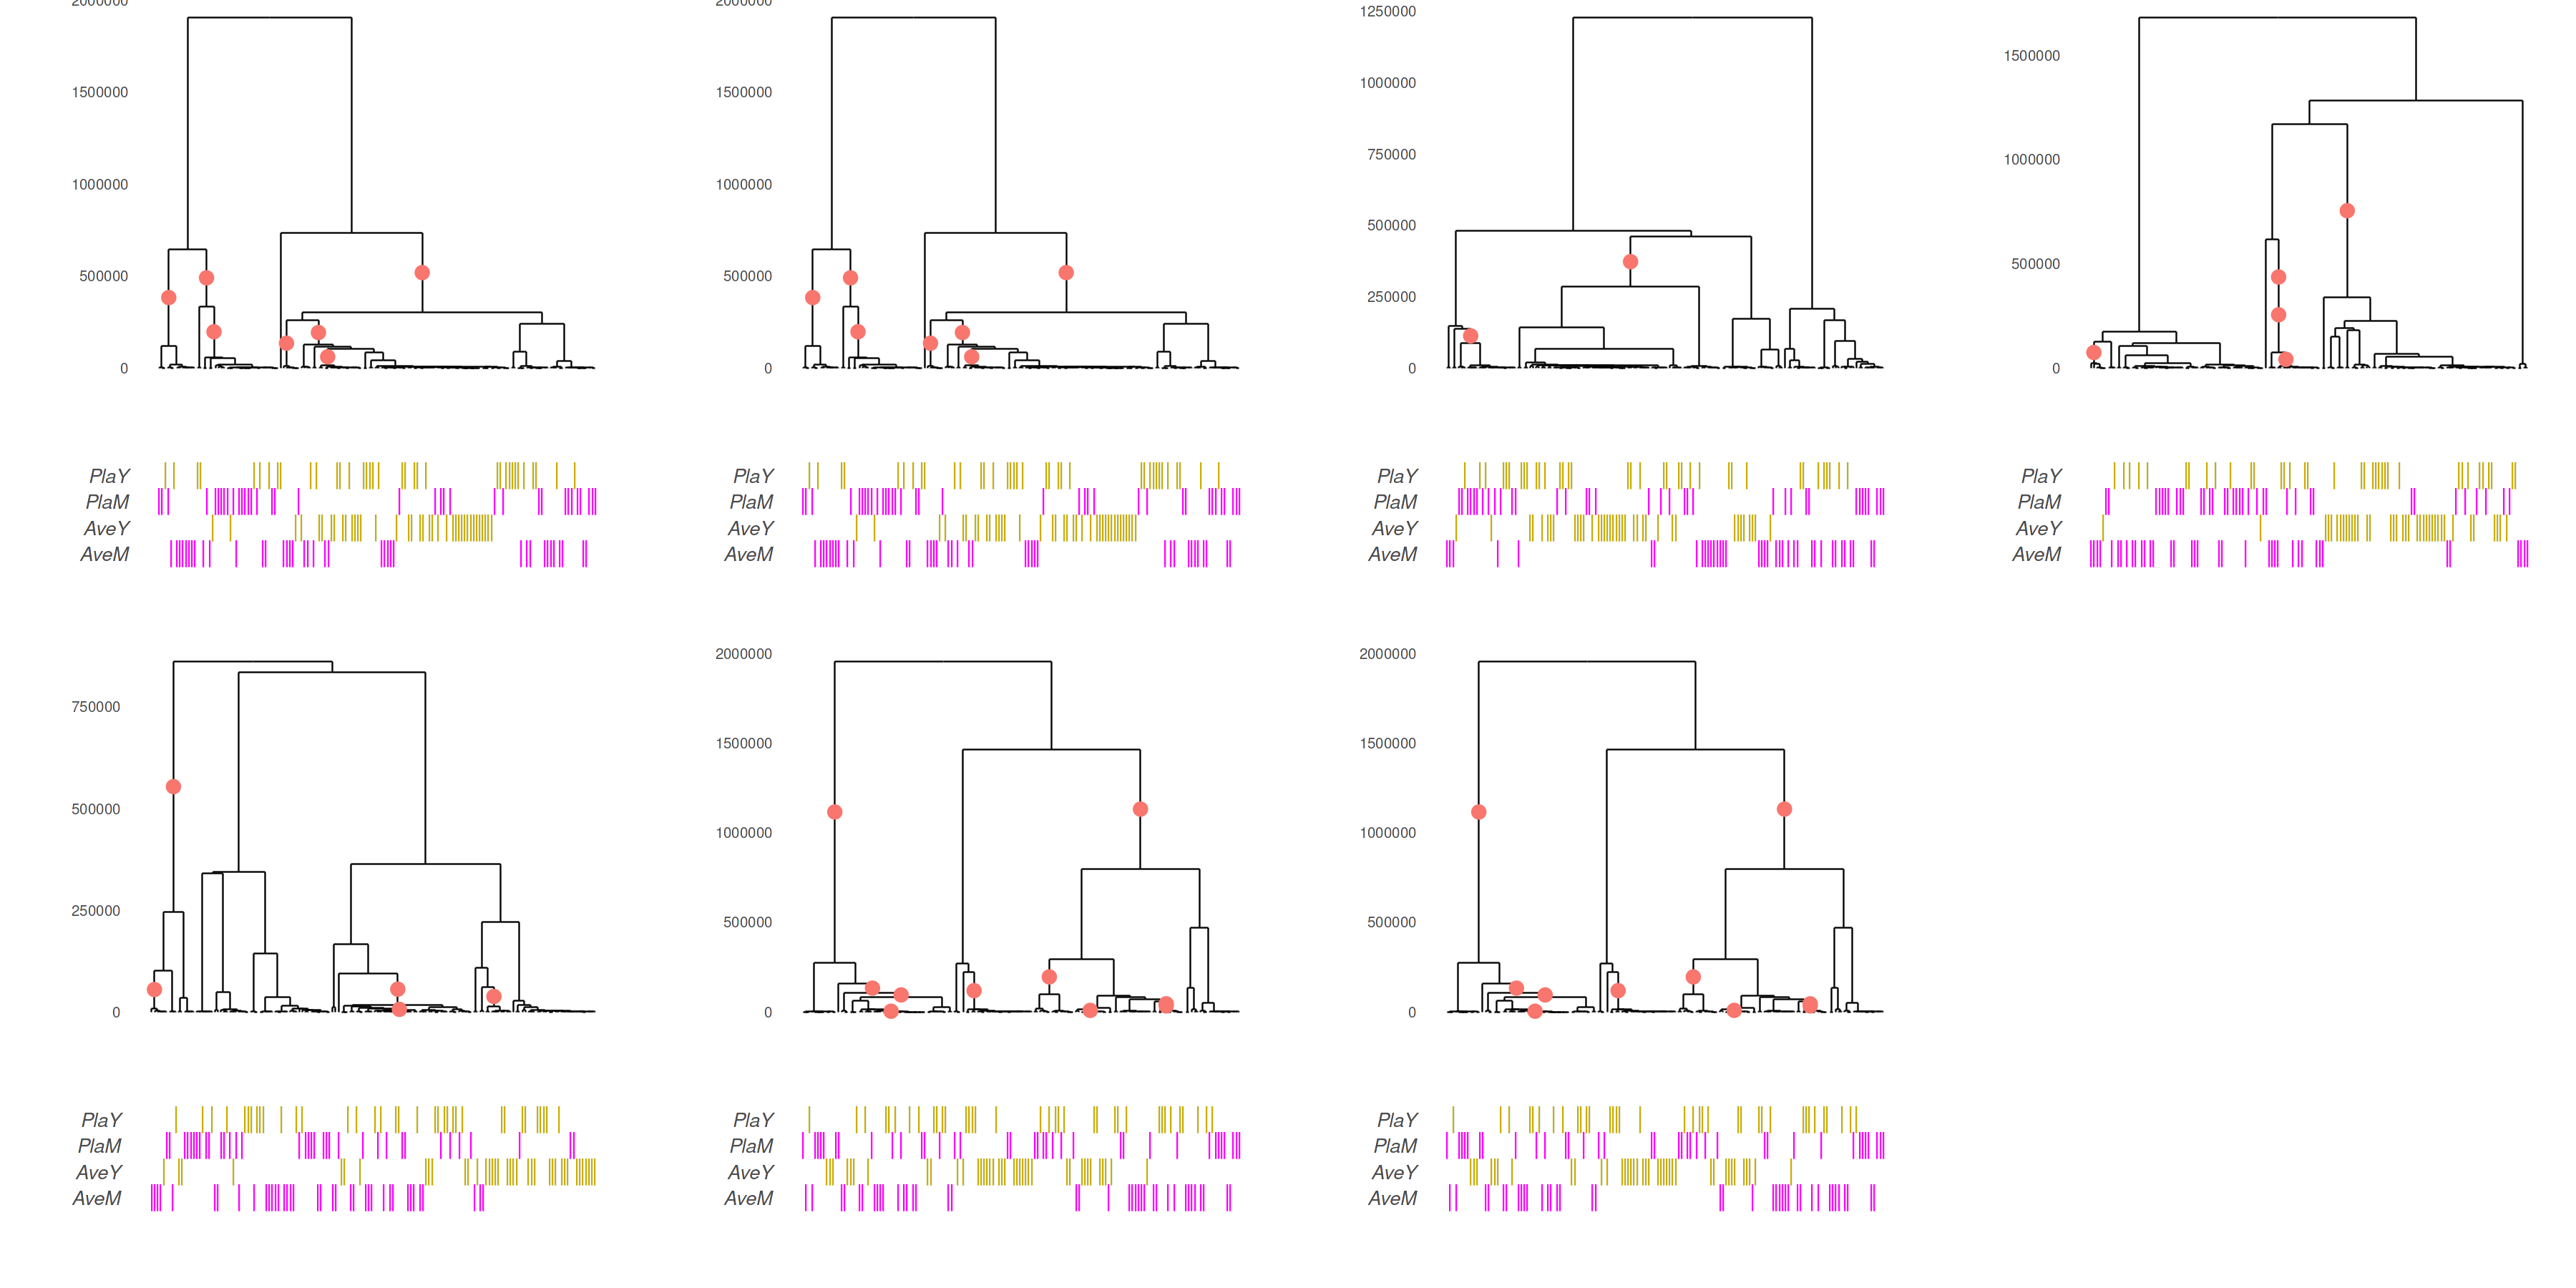

In [175]:
options(repr.plot.width=30, repr.plot.height=15)
pltList = sulfList
plot_grid(pltList[[1]], pltList[[2]], pltList[[3]], pltList[[4]], pltList[[5]], pltList[[6]], pltList[[7]], nrow=2)

In [195]:
### sulf extra
source('./_scripts/treeView.R')
geneName = 'sulf' 

PATH_TO_RELATE = '~/_softwares/relate_v1.2.2'
filename_haps = './Chr4/Chr4.haps.gz'
filename_sample = './Chr4/Chr4.sample'
filename_poplabels = './AvePla.MY.n74.poplabels'
filename_anc = './Chr4/rel_chr4_joint.anc.gz'
filename_mut = './Chr4/rel_chr4_joint.mut.gz'
    
years_per_gen = 3
# snpPos = 38709414
snpPos = 38709138

sulfList_extra = list()
for (snp in snpPos){
    cat(snp, '\n')
    filename_plot = paste('./treeViews/chr4_',geneName,'/chr4_extra_',snp,'_',geneName, sep='')
    plt = drawTree(PATH_TO_RELATE, filename_haps, filename_sample, filename_anc, filename_mut, 
                   filename_poplabels, years_per_gen, snp, filename_plot, geneName,
                   makeFiles = TRUE)

    sulfList_extra[[which(snpPos == snp)]] = plt
}

38709138 


[[1]]


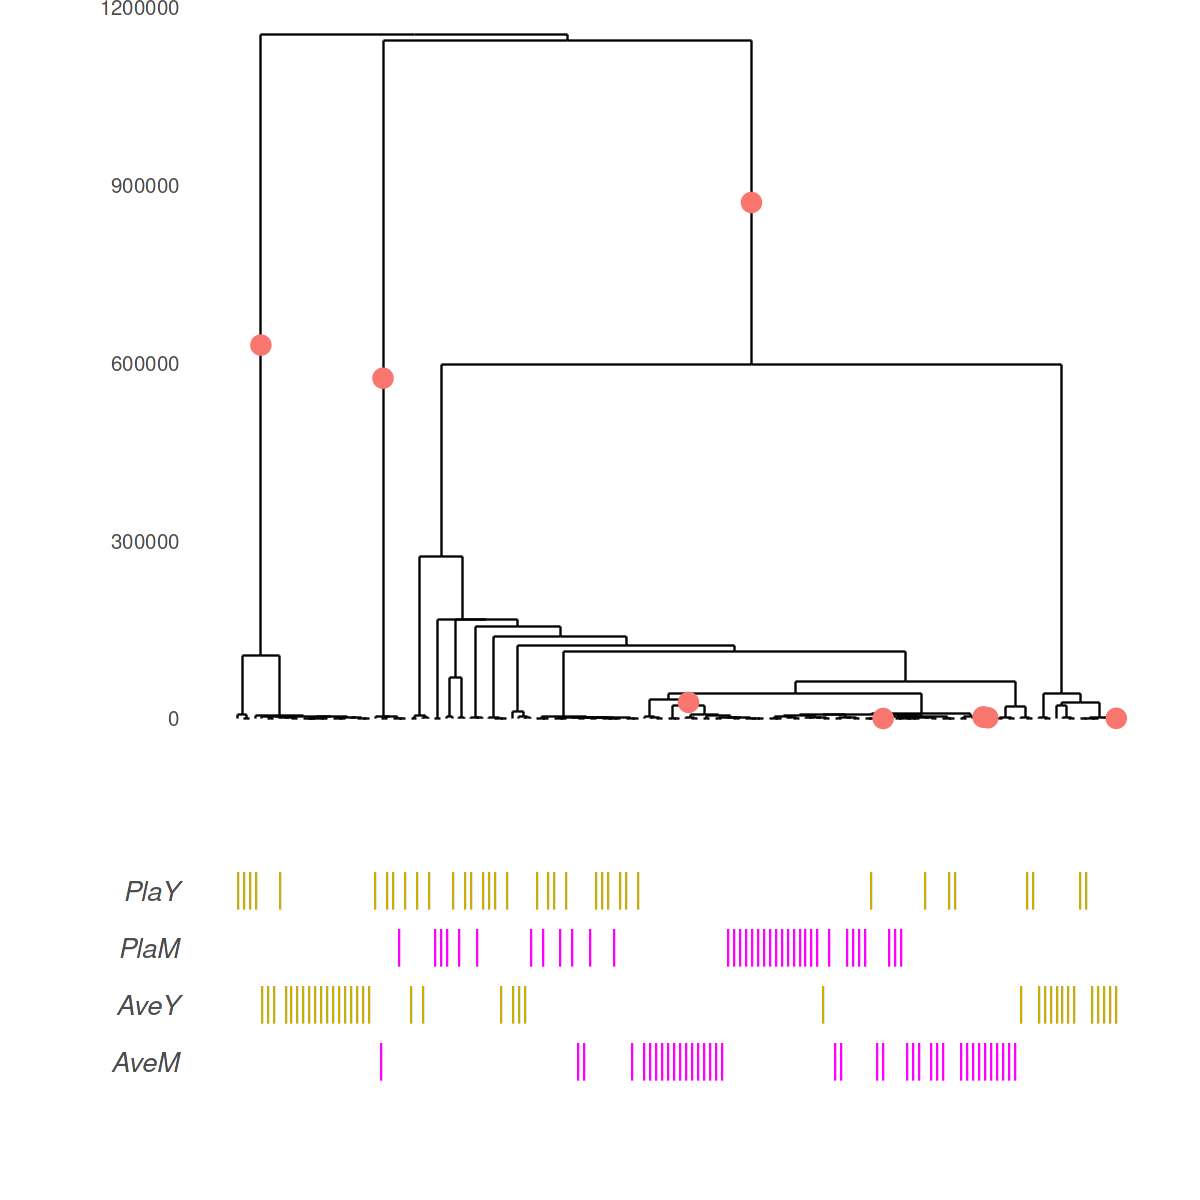

In [192]:
options(repr.plot.width=10, repr.plot.height=10)
sulfList_extra

[[1]]


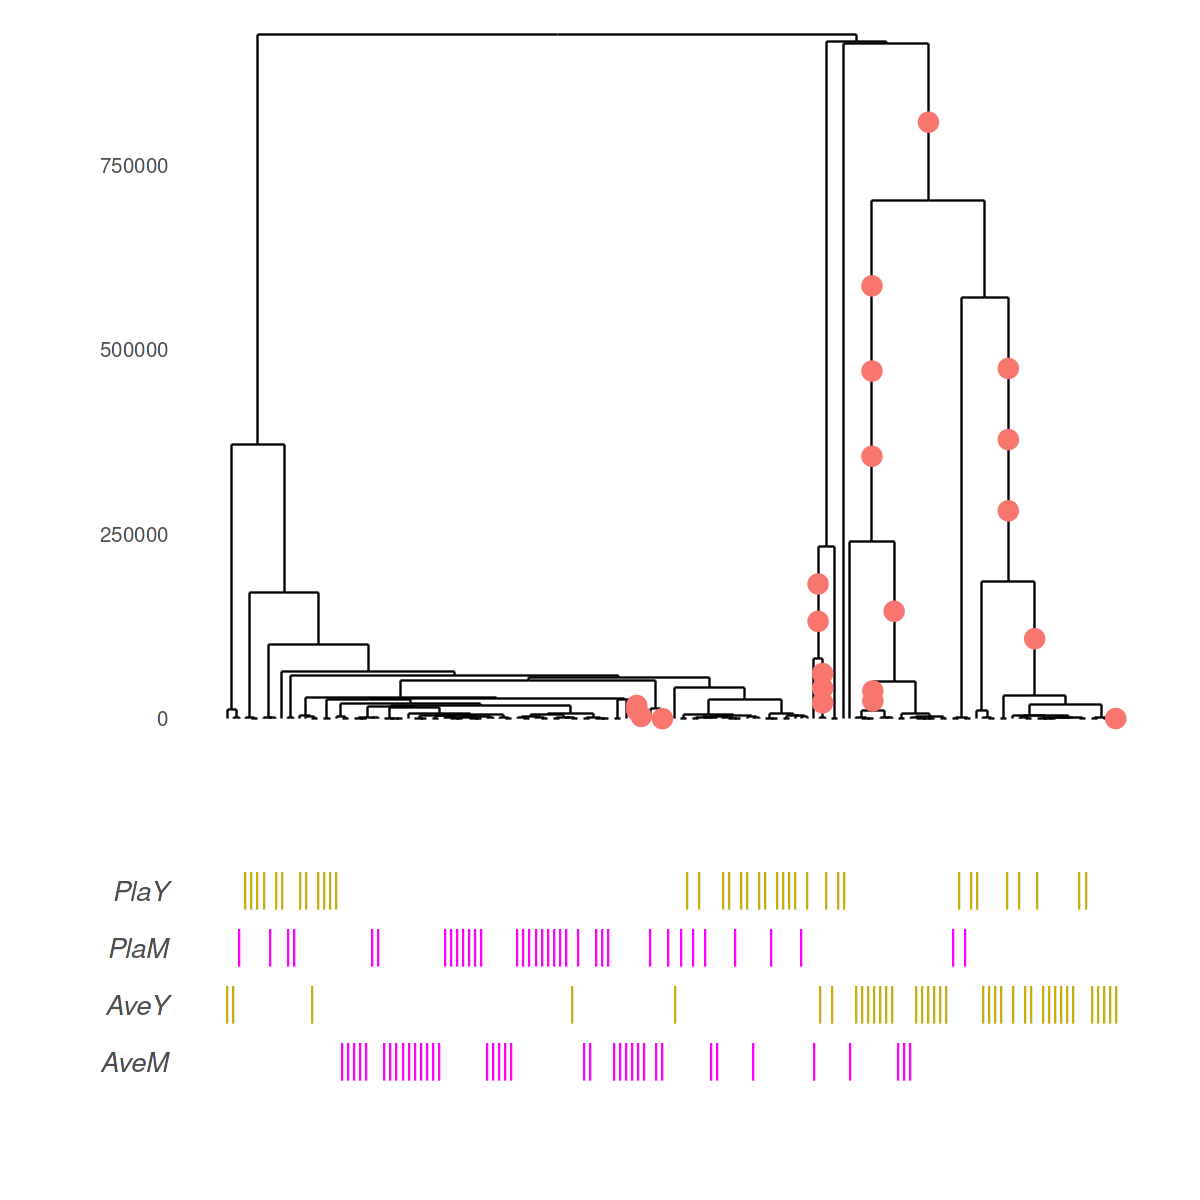

In [196]:
options(repr.plot.width=10, repr.plot.height=10)
sulfList_extra

### Rubia

In [176]:
source('./_scripts/treeView.R')
geneName = 'rubia' 

PATH_TO_RELATE = '~/_softwares/relate_v1.2.2'
filename_haps = './Chr5/Chr5.haps.gz'
filename_sample = './Chr5/Chr5.sample'
filename_poplabels = './AvePla.MY.n74.poplabels'
filename_anc = './Chr5/rel_chr5_joint.anc.gz'
filename_mut = './Chr5/rel_chr5_joint.mut.gz'
    
years_per_gen = 3
snpPos = c(6307344, 6307410, 6307489, 6307562, 6307668, 6307778, 6307854)

rubiaList = list()
for (snp in snpPos){
    cat(snp, '\n')
    filename_plot = paste('./treeViews/chr5_',geneName,'/chr5_',snp,'_',geneName, sep='')
    plt = drawTree(PATH_TO_RELATE, filename_haps, filename_sample, filename_anc, filename_mut, 
                   filename_poplabels, years_per_gen, snp, filename_plot, geneName,
                   makeFiles = FALSE)

    rubiaList[[which(snpPos == snp)]] = plt
}

6307344 
6307410 
6307489 
6307562 
6307668 
6307778 
6307854 


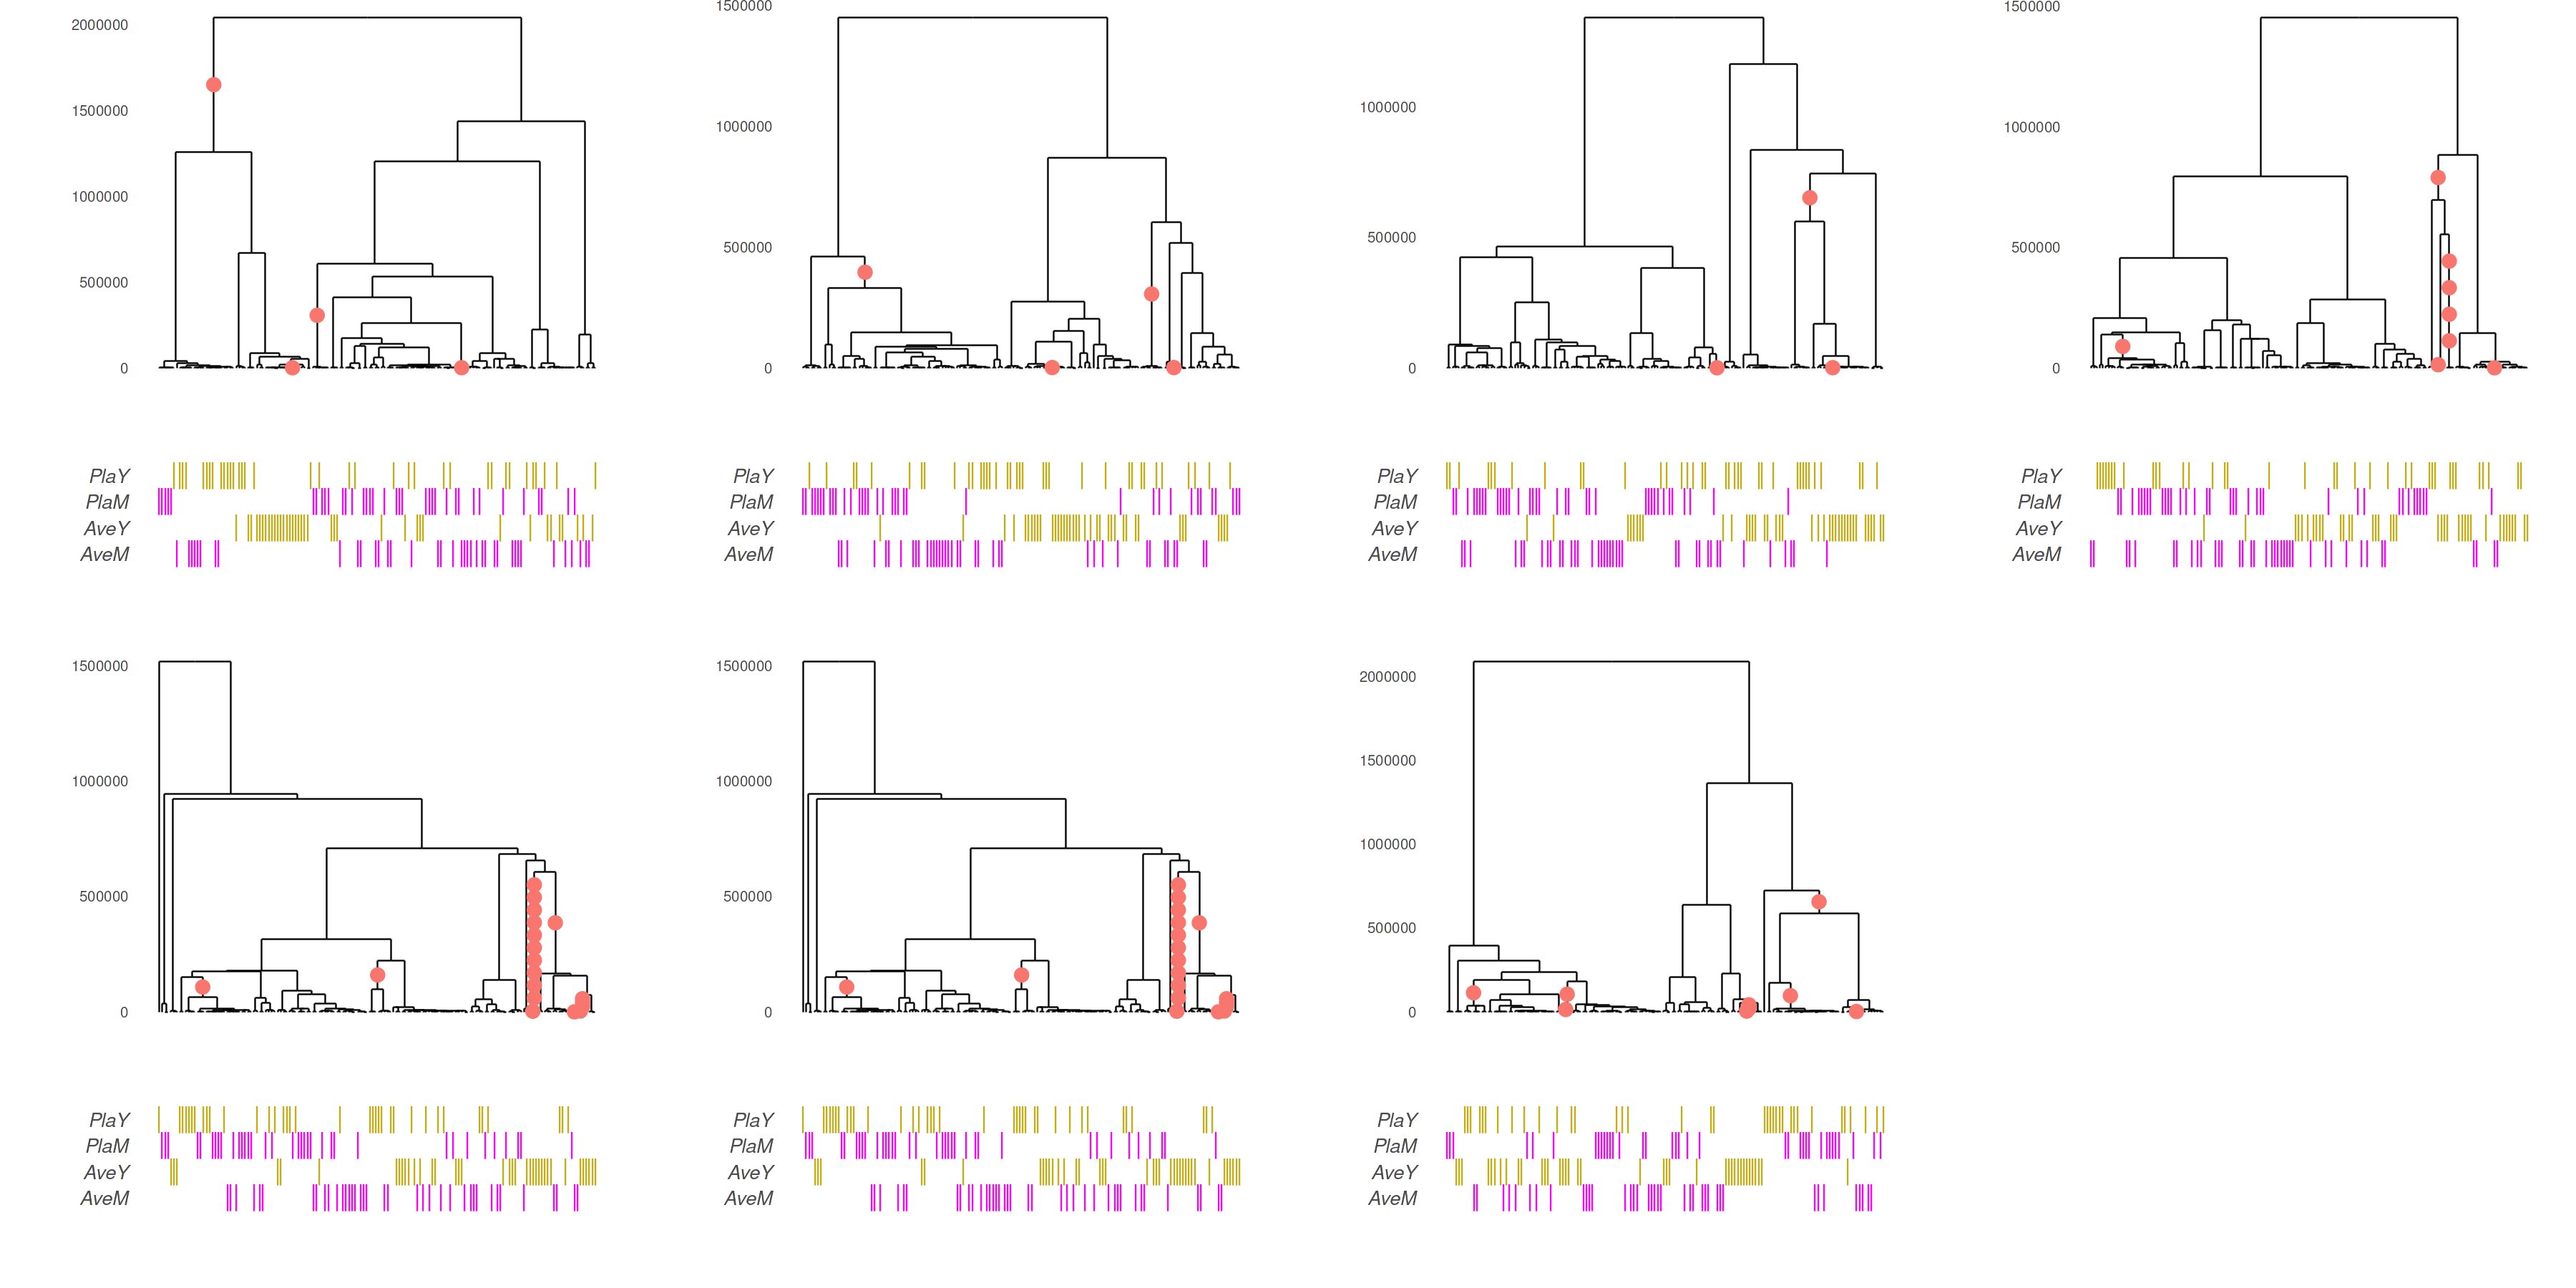

In [177]:
options(repr.plot.width=30, repr.plot.height=15)
pltList = rubiaList
plot_grid(pltList[[1]], pltList[[2]], pltList[[3]], pltList[[4]], pltList[[5]], pltList[[6]], pltList[[7]], nrow=2)

In [1]:
## Check mutation plotting



ERROR: Error in eval(expr, envir, enclos): object 'a' not found


### Ros

In [17]:
print(dat6[treeID %in% 513855:513861, c(1,5,6,11:15)])

   treeID    start      end      mid sites wt1.smooth wt2.smooth wt3.smooth
    <int>    <int>    <int>    <num> <int>      <num>      <num>      <num>
1: 513855 52884444 52884470 52884457     2  0.1684181  0.6744234  0.1571585
2: 513856 52884471 52884507 52884489     1  0.1680954  0.6751202  0.1567844
3: 513857 52884508 52884547 52884528     2  0.1677126  0.6759475  0.1563399
4: 513858 52884548 52884558 52884553     1  0.1674623  0.6764888  0.1560489
5: 513859 52884559 52884580 52884570     1  0.1673017  0.6768362  0.1558621
6: 513860 52884581 52884666 52884624     1  0.1667843  0.6779568  0.1552589
7: 513861 52884667 52884761 52884714     5  0.1659450  0.6797782  0.1542769


#### Build checks-Trees

In [18]:
snpPos = c(52884471, 52884508, 52884548, 52884559) ## start positions

source('./_scripts/treeView.R')
geneName = 'ros' 
PATH_TO_RELATE = '~/_softwares/relate_v1.2.2'
filename_haps = './Chr6/Chr6.haps.gz'
filename_sample = './Chr6/Chr6.sample'
filename_poplabels = './AvePla.MY.n74.poplabels'
filename_anc = './reEstimateBranchLengths/rel_chr6_updated.anc.gz'
filename_mut = './reEstimateBranchLengths/rel_chr6_updated.mut.gz'
years_per_gen = 3

In [233]:
#### Check 1 – Draw trees with Relate
#### Use start postion as the bp_of_interest
rosList_check1 = list()
i = 1
for (snp in snpPos){    
    start = dat6[which(dat6$start == snp), 'start']
    end = dat6[which(dat6$start == snp), 'end']
    snp = start
    cat(as.numeric(start),'\t', as.numeric(end),'\t', as.numeric(snp),'\n')
  
    filename_plot = paste('./treeViews/chr6_',geneName,'/check1_chr6_snp',snp,'_start',start,'_end',end,'_',geneName, sep='')
    plt = drawTree(PATH_TO_RELATE, filename_haps, filename_sample, filename_anc, filename_mut, 
                 filename_poplabels, years_per_gen, snp, filename_plot, geneName,
                 makeFiles = FALSE)
  
    rosList_check1[[i]] = plt
    i = i+1
}

52884471 	 52884507 	 52884471 
52884508 	 52884547 	 52884508 
52884548 	 52884558 	 52884548 
52884559 	 52884580 	 52884559 


In [234]:
#### Check 2 – Draw trees with Relate
#### Use start postion as the bp_of_interest+1
rosList_check2 = list()
i = 1
for (snp in snpPos){    
    start = dat6[which(dat6$start == snp), 'start']
    end = dat6[which(dat6$start == snp), 'end']
    snp = start+1  
    cat(as.numeric(start),'\t', as.numeric(end),'\t', as.numeric(snp),'\n')
  
    filename_plot = paste('./treeViews/chr6_',geneName,'/check2_chr6_snp',snp,'_start',start,'_end',end,'_',geneName, sep='')
    plt = drawTree(PATH_TO_RELATE, filename_haps, filename_sample, filename_anc, filename_mut, 
                 filename_poplabels, years_per_gen, snp, filename_plot, geneName,
                 makeFiles = T)

    rosList_check2[[i]] = plt
    i = i+1
}

52884471 	 52884507 	 52884472 
52884508 	 52884547 	 52884509 
52884548 	 52884558 	 52884549 
52884559 	 52884580 	 52884560 


In [235]:
#### Check 3 – Draw trees with Relate
#### Use start postion as the bp_of_interest+2
rosList_check3 = list()
i = 1
for (snp in snpPos){
    start = dat6[which(dat6$start == snp), 'start']
    end = dat6[which(dat6$start == snp), 'end']
    snp = start+2  
    cat(as.numeric(start),'\t', as.numeric(end),'\t', as.numeric(snp),'\n')
  
    filename_plot = paste('./treeViews/chr6_',geneName,'/check3_chr6_snp',snp,'_start',start,'_end',end,'_',geneName, sep='')
    plt = drawTree(PATH_TO_RELATE, filename_haps, filename_sample, filename_anc, filename_mut, 
                 filename_poplabels, years_per_gen, snp, filename_plot, geneName,
                 makeFiles = T)
    rosList_check3[[i]] = plt
    i = i+1
}

52884471 	 52884507 	 52884473 
52884508 	 52884547 	 52884510 
52884548 	 52884558 	 52884550 
52884559 	 52884580 	 52884561 


In [236]:
#### Check 4 – Draw trees with Relate
#### Use start postion as mid
rosList_check4 = list()
i = 1
for (snp in snpPos){
    start = dat6[which(dat6$start == snp), 'start']
    end = dat6[which(dat6$start == snp), 'end']
    snp = dat6[which(dat6$start == snp), 'mid']
    cat(as.numeric(start),'\t', as.numeric(end),'\t', as.numeric(snp),'\n')
  
    filename_plot = paste('./treeViews/chr6_',geneName,'/check4_chr6_snp',snp,'_start',start,'_end',end,'_',geneName, sep='')
    plt = drawTree(PATH_TO_RELATE, filename_haps, filename_sample, filename_anc, filename_mut, 
                 filename_poplabels, years_per_gen, snp, filename_plot, geneName,
                 makeFiles = T)
    rosList_check4[[i]] = plt
    i = i+1
}

52884471 	 52884507 	 52884489 
52884508 	 52884547 	 52884528 
52884548 	 52884558 	 52884553 
52884559 	 52884580 	 52884570 


#### Draw check-Trees

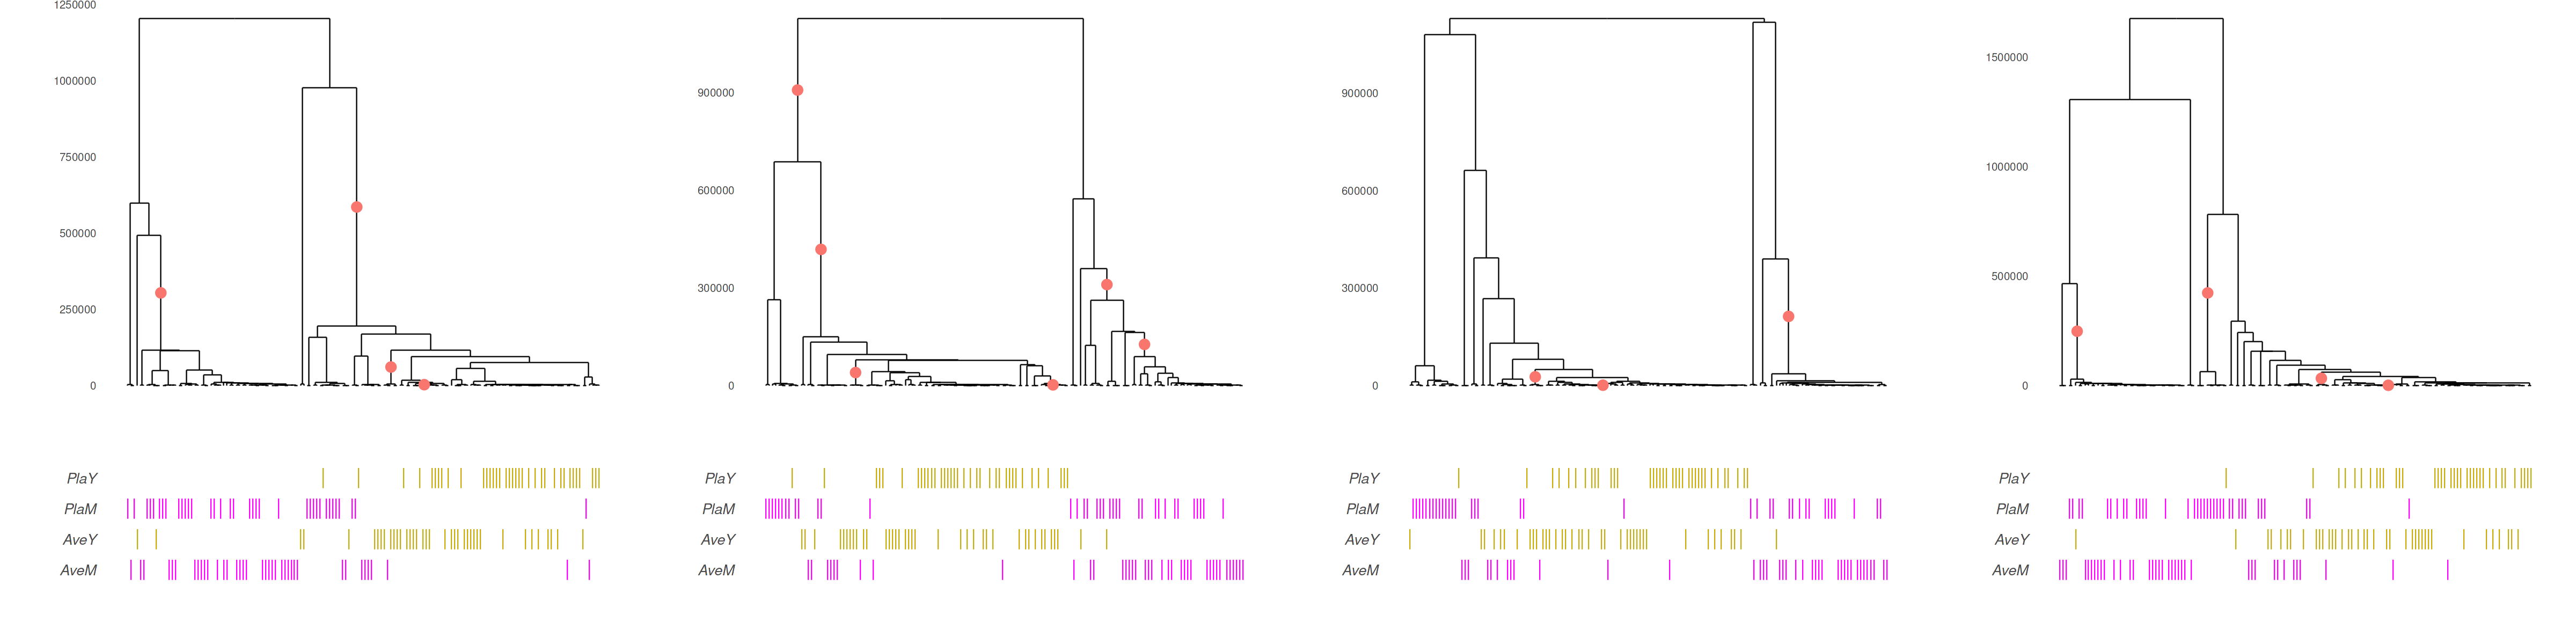

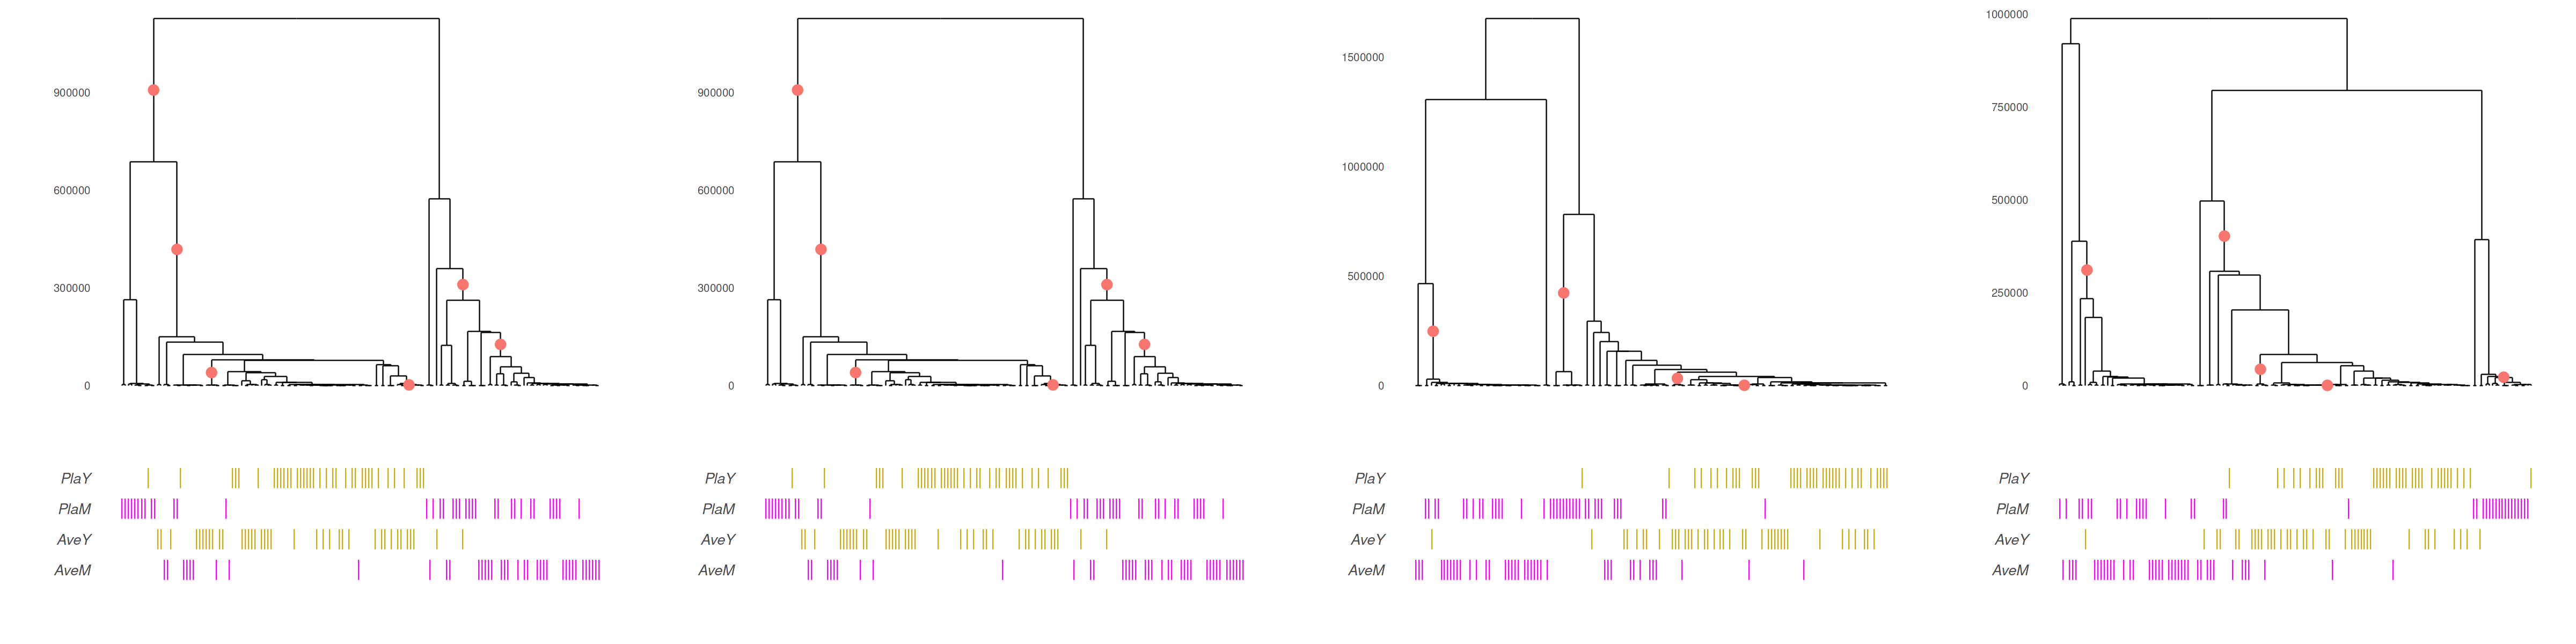

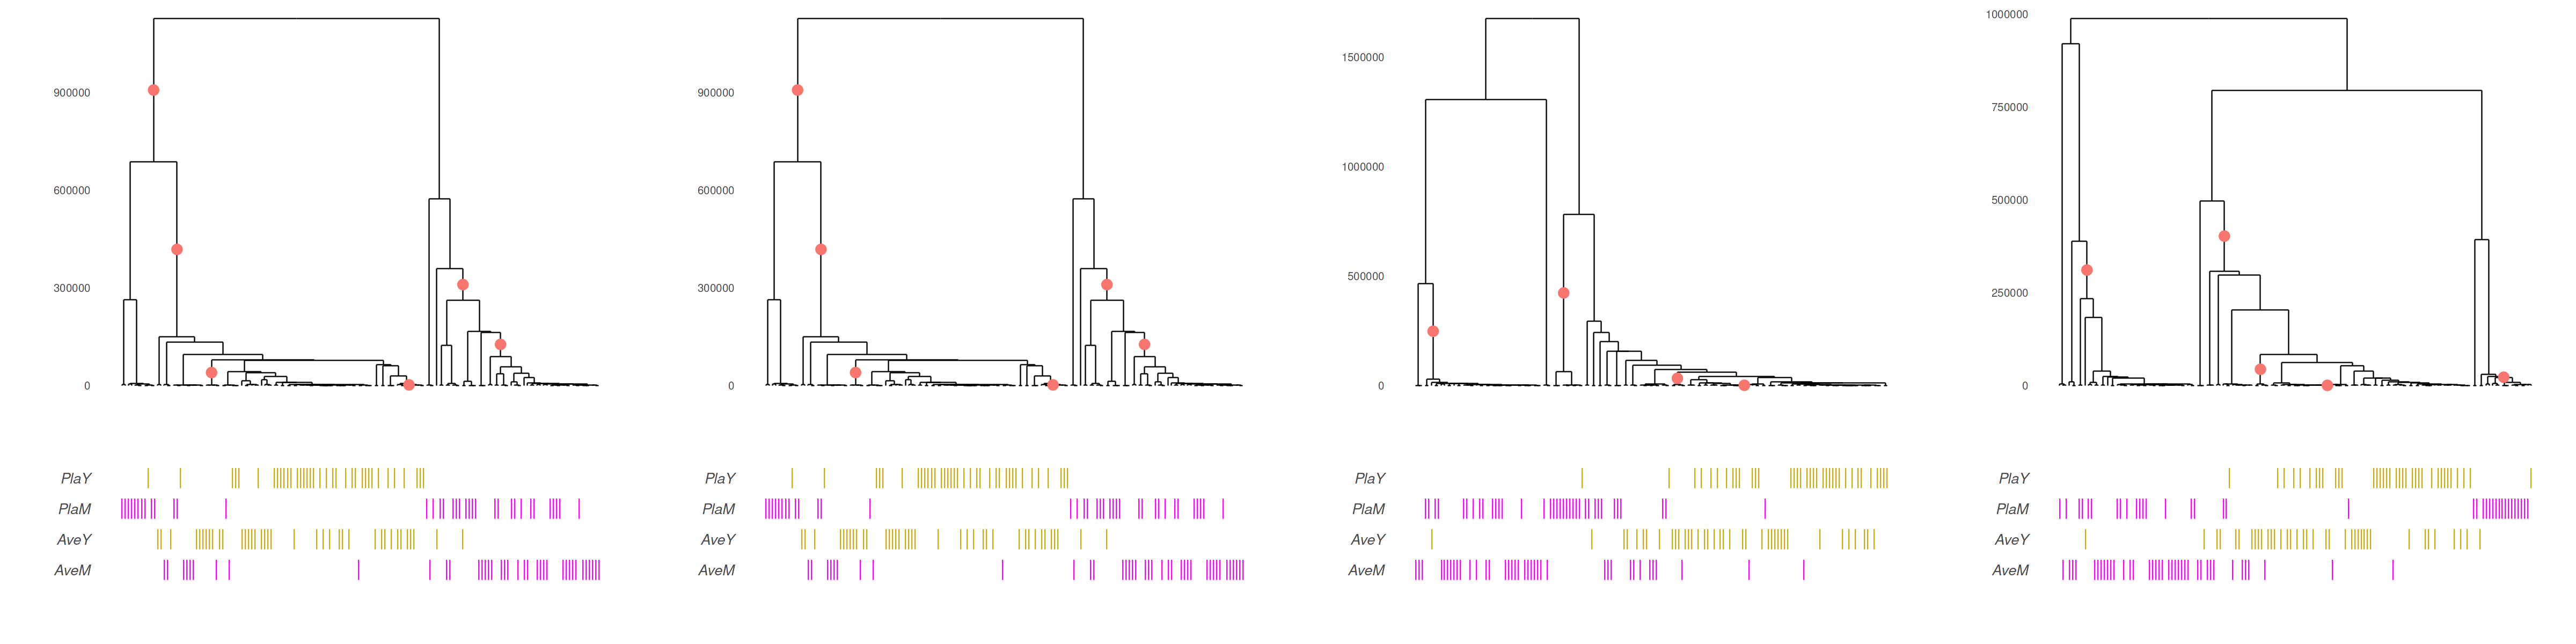

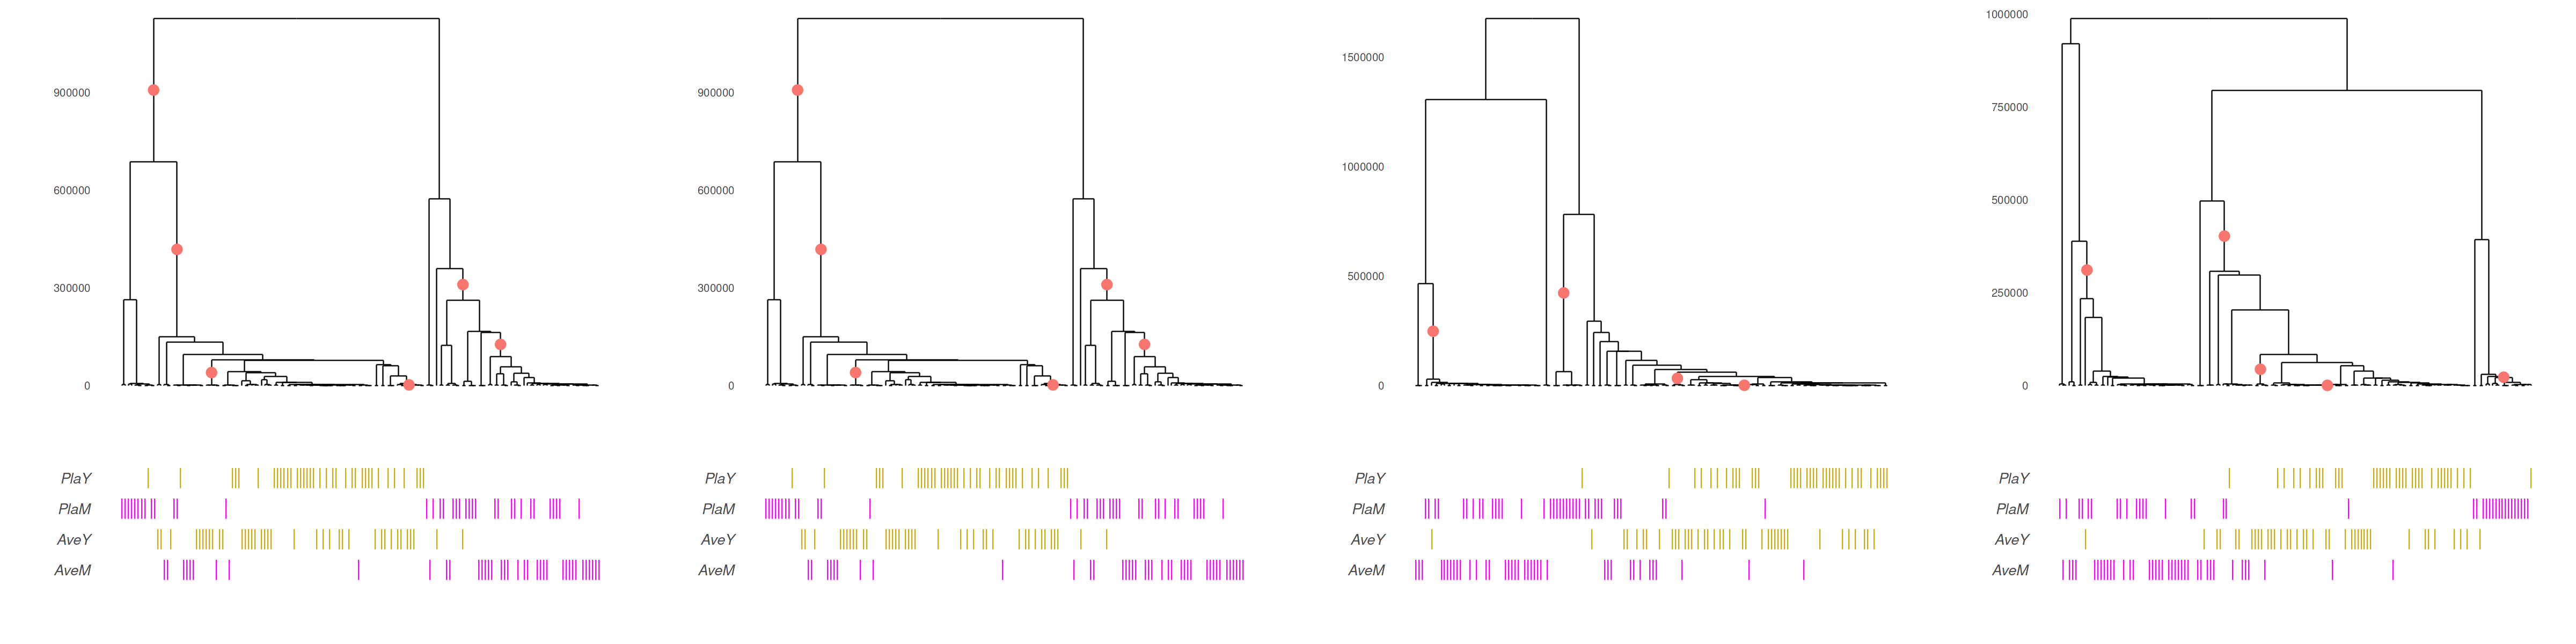

In [229]:
options(repr.plot.width=40, repr.plot.height=10)
pltList = rosList_check1; plot_grid(pltList[[1]], pltList[[2]], pltList[[3]], pltList[[4]], nrow=1) ## snp = start
pltList = rosList_check2; plot_grid(pltList[[1]], pltList[[2]], pltList[[3]], pltList[[4]], nrow=1) ## snp = start+1
pltList = rosList_check3; plot_grid(pltList[[1]], pltList[[2]], pltList[[3]], pltList[[4]], nrow=1) ## snp = mid
pltList = rosList_check4; plot_grid(pltList[[1]], pltList[[2]], pltList[[3]], pltList[[4]], nrow=1) ## snp = mid

### Draw with ape package

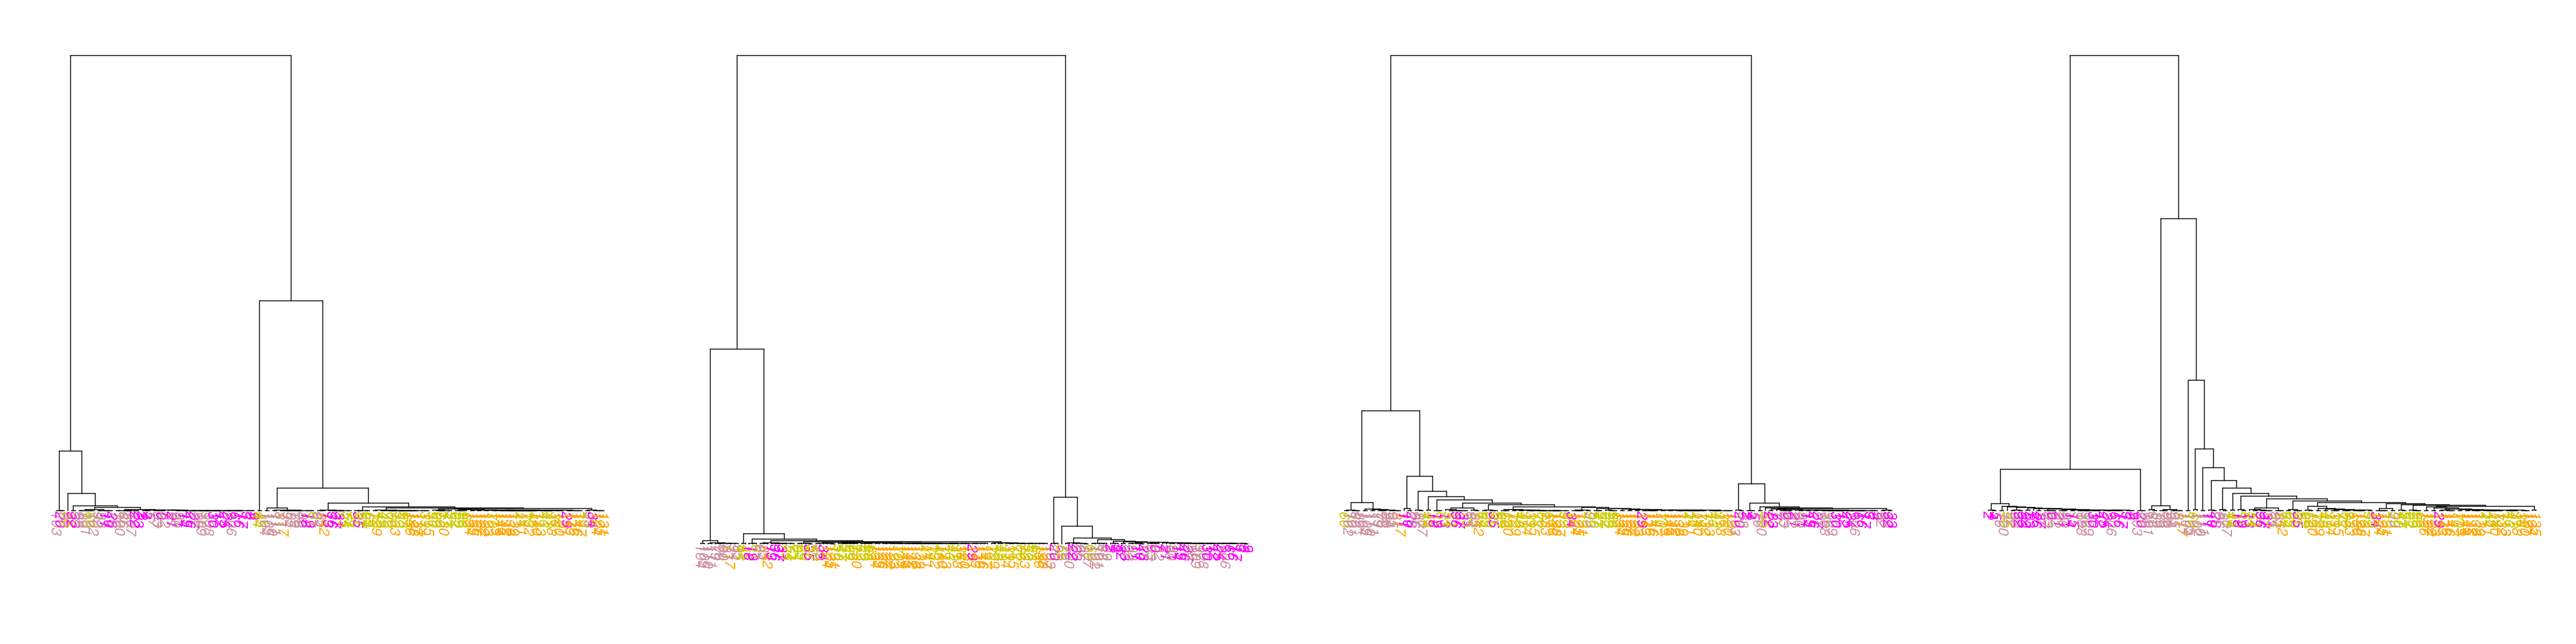

In [237]:
options(repr.plot.width=40, repr.plot.height=10)
par(mfrow=c(1,4))
rosTr1 = read.tree(text = as.character(dat6[513856,16]))
tr=rosTr1; plot.phylo(tr, tip.color = tipInfo[match(as.integer(tr$tip.label), tipInfo$IDs), "tipColors"], cex=2, direction='down')

rosTr2 = read.tree(text = as.character(dat6[513857,16]))
tr=rosTr2; plot.phylo(tr, tip.color = tipInfo[match(as.integer(tr$tip.label), tipInfo$IDs), "tipColors"], cex=2, direction='down')

rosTr3 = read.tree(text = as.character(dat6[513858,16]))
tr=rosTr3; plot.phylo(tr, tip.color = tipInfo[match(as.integer(tr$tip.label), tipInfo$IDs), "tipColors"], cex=2, direction='down')

rosTr4 = read.tree(text = as.character(dat6[513859,16]))
tr=rosTr4; plot.phylo(tr, tip.color = tipInfo[match(as.integer(tr$tip.label), tipInfo$IDs), "tipColors"], cex=2, direction='down')

### prelim

In [151]:
source('./_scripts/treeView.R')
geneName = 'ros' 
PATH_TO_RELATE = '~/_softwares/relate_v1.2.2'
filename_haps = './Chr6/Chr6.haps.gz'
filename_sample = './Chr6/Chr6.sample'
filename_poplabels = './AvePla.MY.n74.poplabels'
filename_anc = './Chr6/rel_chr6_joint.anc.gz'
filename_mut = './Chr6/rel_chr6_joint.mut.gz'
years_per_gen = 3
# snpPos = c(52884457, 52884489, 52884528, 52884553, 52884570, 52884624, 52884770)
treeIDs = 513855:513861
# snpPos = 52884457
rosList = list()
for (treeID in treeIDs){
  start = dat6[treeID, 'start']
  end = dat6[treeID, 'end']
  snp = start
  
  cat(treeID,'\n')
  
  filename_plot = paste('./treeViews/chr6_',geneName,'/chr6_trID',treeID,'_start',start,'_end',end,'_',geneName, sep='')
  plt = drawTree(PATH_TO_RELATE, filename_haps, filename_sample, filename_anc, filename_mut, 
                 filename_poplabels, years_per_gen, snp, filename_plot, geneName,
                 makeFiles = TRUE)
  
  rosList[[which(treeIDs == treeID)]] = plt
}

513855 
513856 
513857 
513858 
513859 
513860 
513861 


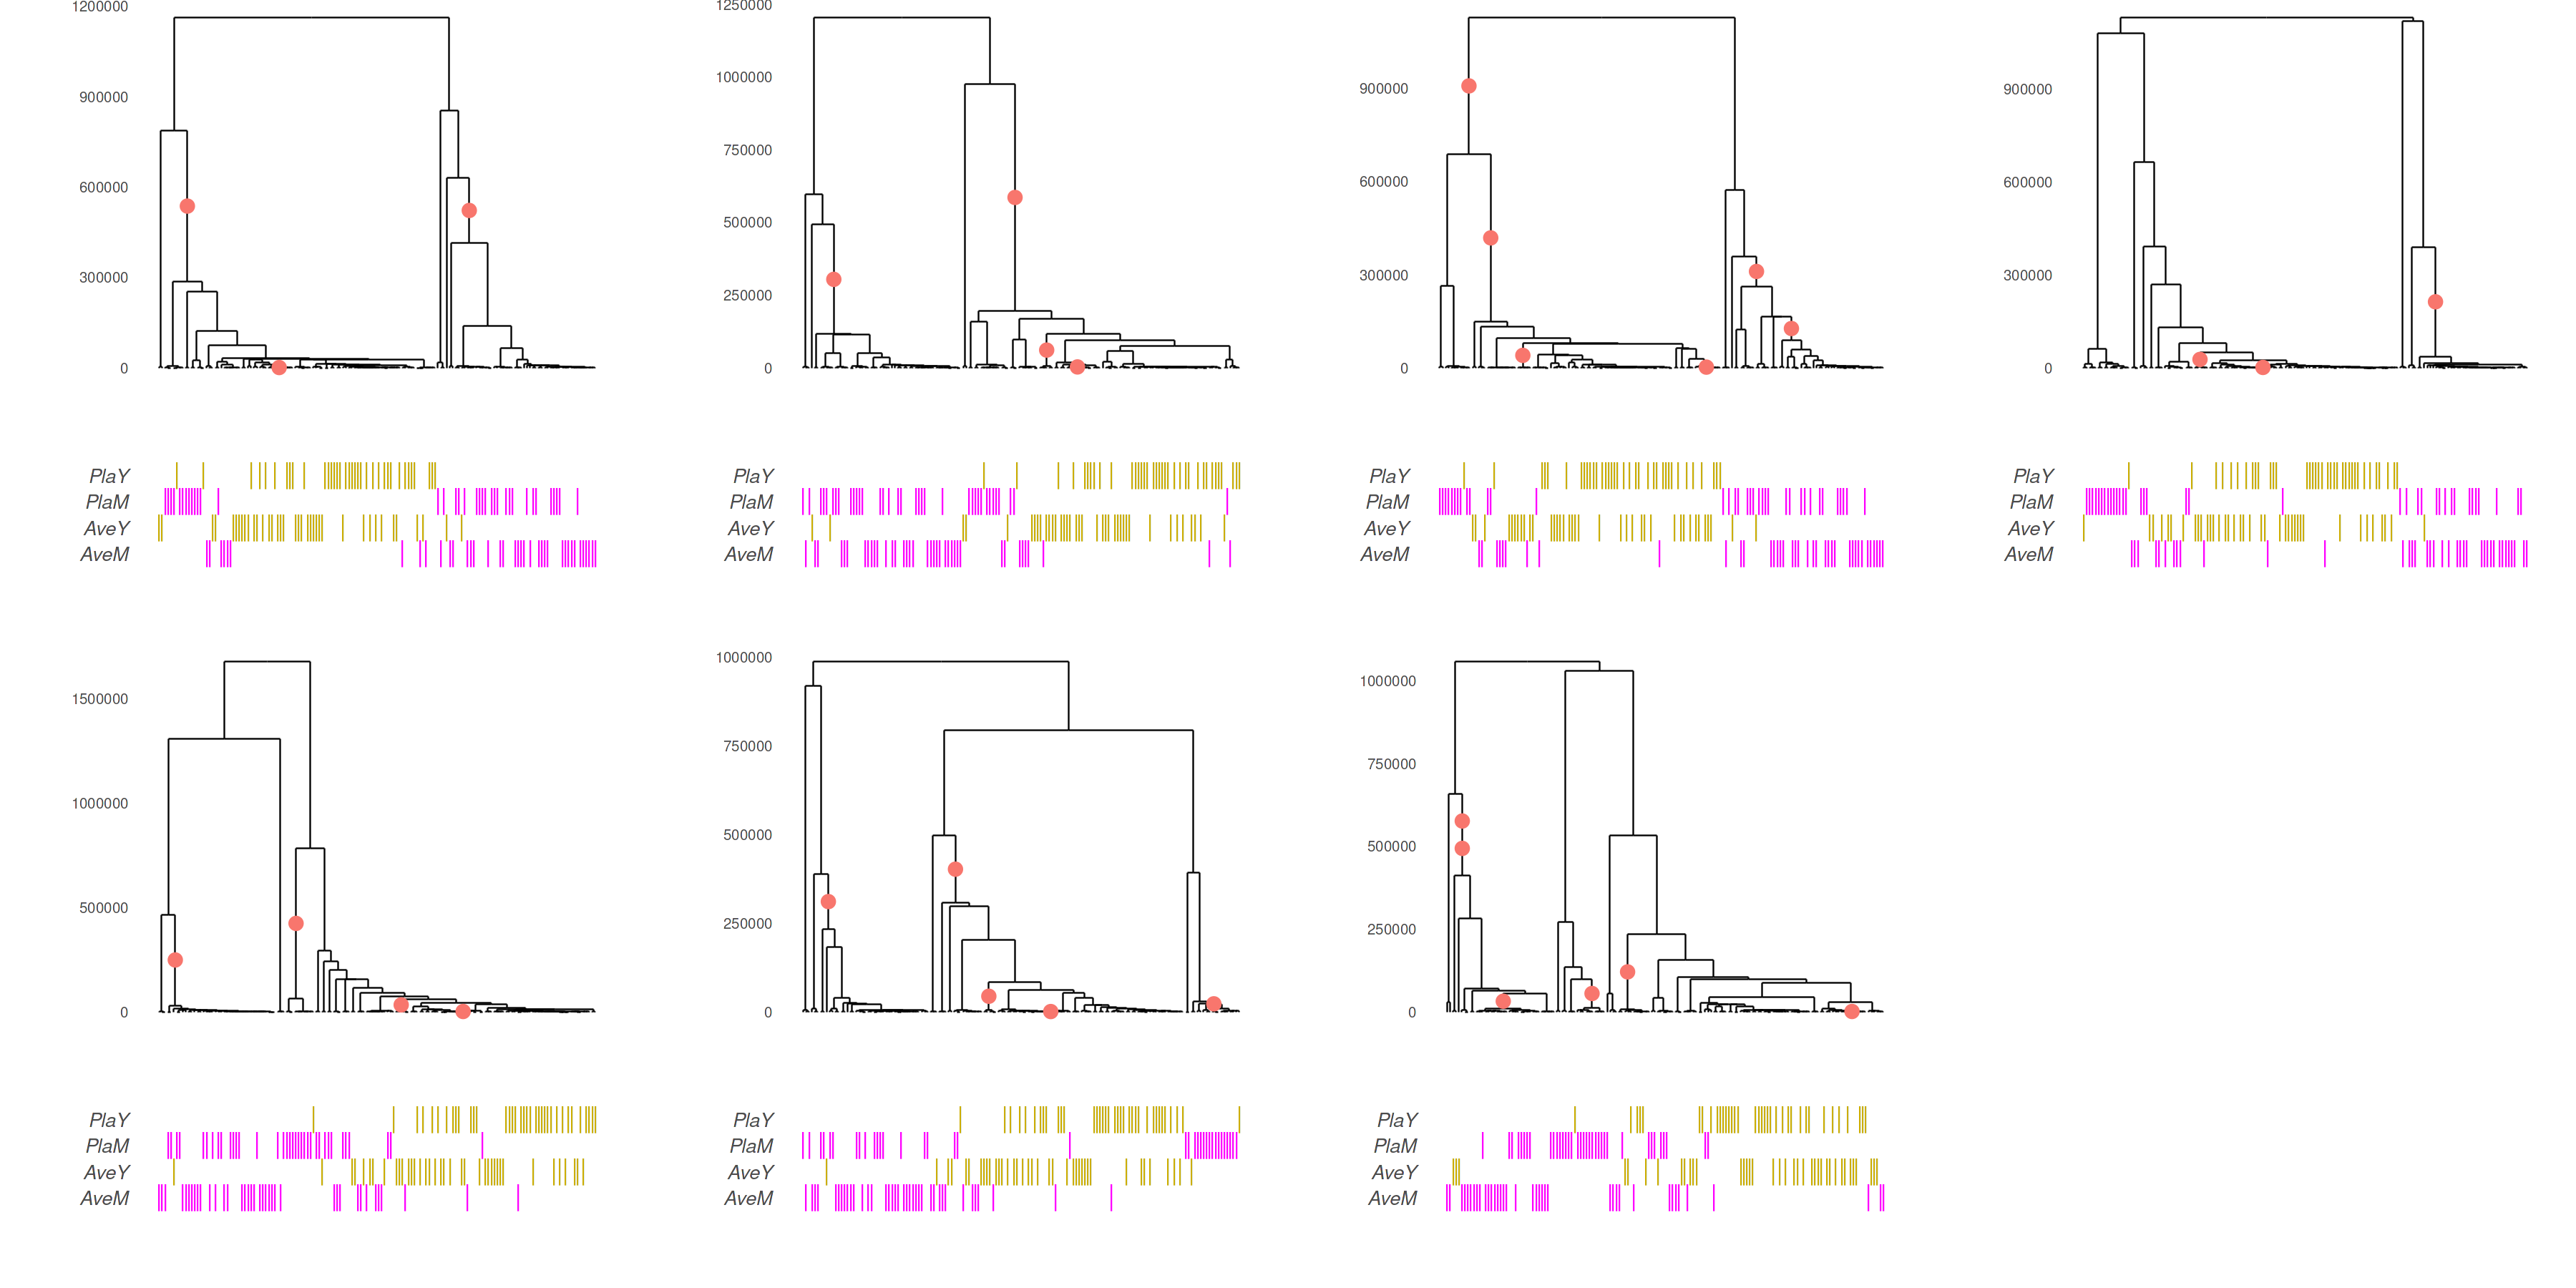

In [152]:
options(repr.plot.width=30, repr.plot.height=15)
pltList = rosList
plot_grid(pltList[[1]], pltList[[2]], pltList[[3]], pltList[[4]], pltList[[5]], pltList[[6]], pltList[[7]], nrow=2)

In [148]:
source('./_scripts/treeView.R')
geneName = 'ros' 
PATH_TO_RELATE = '~/_softwares/relate_v1.2.2'
filename_haps = './Chr6/Chr6.haps.gz'
filename_sample = './Chr6/Chr6.sample'
filename_poplabels = './AvePla.MY.n74.poplabels'
filename_anc = './Chr6/rel_chr6_joint.anc.gz'
filename_mut = './Chr6/rel_chr6_joint.mut.gz'
years_per_gen = 3
# snpPos = c(52884457, 52884489, 52884528, 52884553, 52884570, 52884624, 52884770)
treeIDs = 513855:513861
# snpPos = 52884457
rosList = list()
for (treeID in treeIDs){
  start = dat6[treeID, 'start']
  end = dat6[treeID, 'end']
  snp = start+1
  
  cat(treeID,'\n')
  
  filename_plot = paste('./treeViews/chr6_',geneName,'/chr6_trID',treeID,'_start',start,'_end',end,'_',geneName, sep='')
  plt = drawTree(PATH_TO_RELATE, filename_haps, filename_sample, filename_anc, filename_mut, 
                 filename_poplabels, years_per_gen, snp, filename_plot, geneName,
                 makeFiles = TRUE)
  
  rosList[[which(treeIDs == treeID)]] = plt
}

513855 
513856 
513857 
513858 
513859 
513860 
513861 


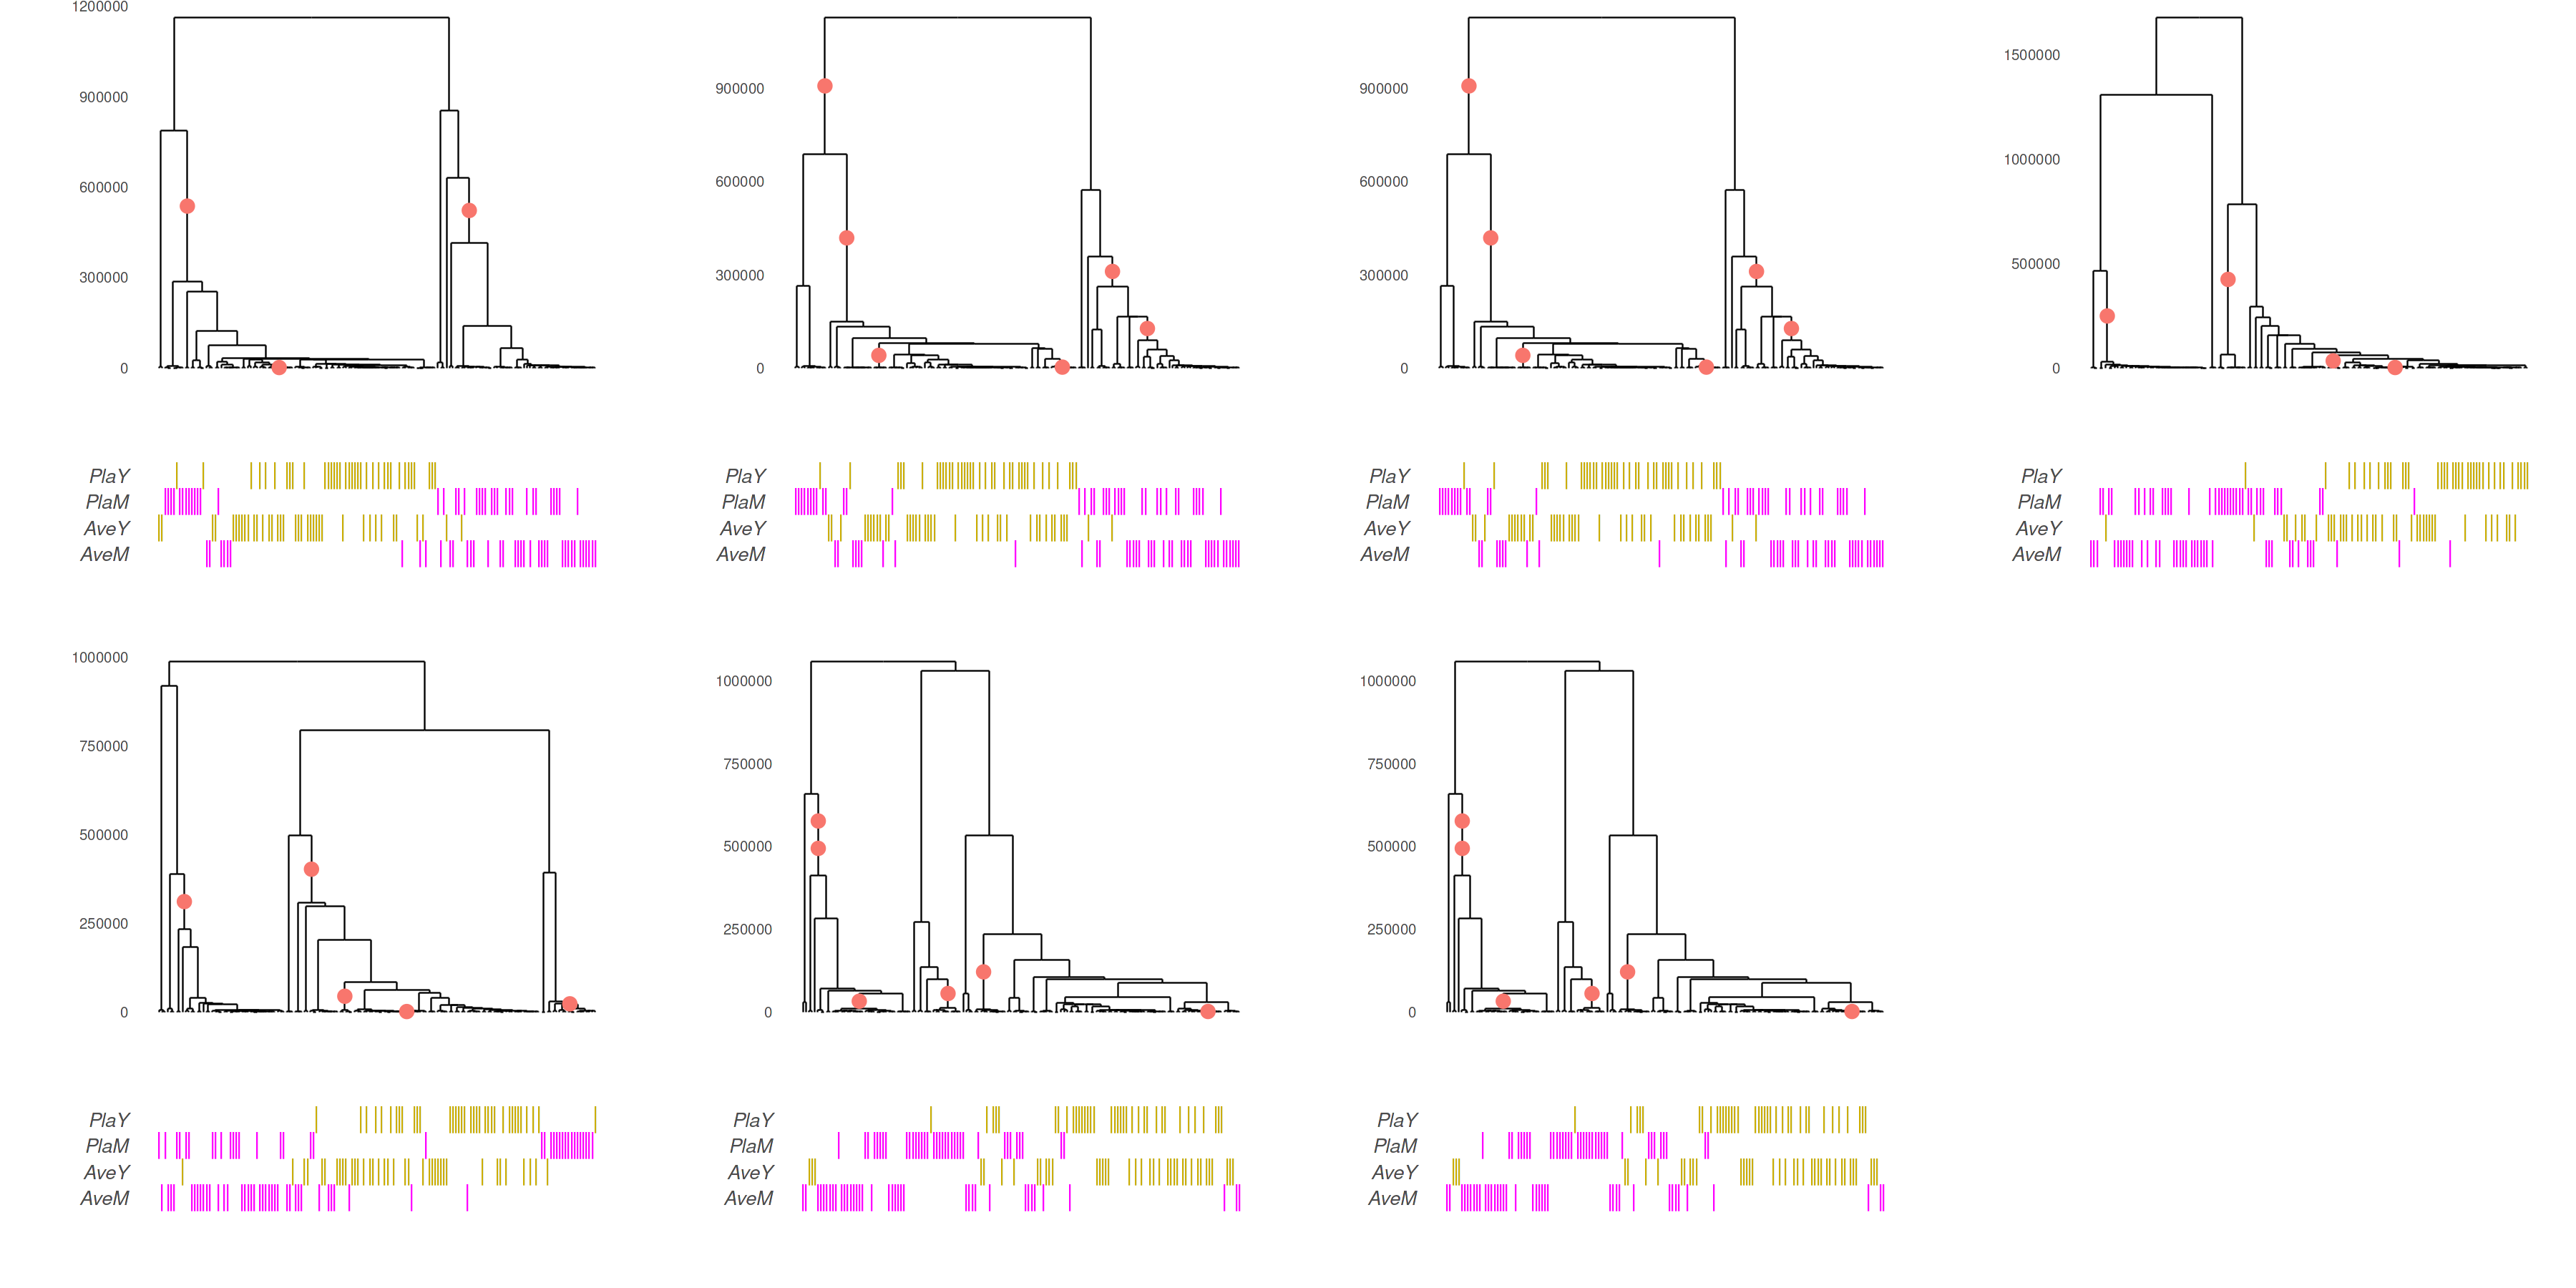

In [150]:
options(repr.plot.width=30, repr.plot.height=15)
pltList = rosList
plot_grid(pltList[[1]], pltList[[2]], pltList[[3]], pltList[[4]], pltList[[5]], pltList[[6]], pltList[[7]], nrow=2)

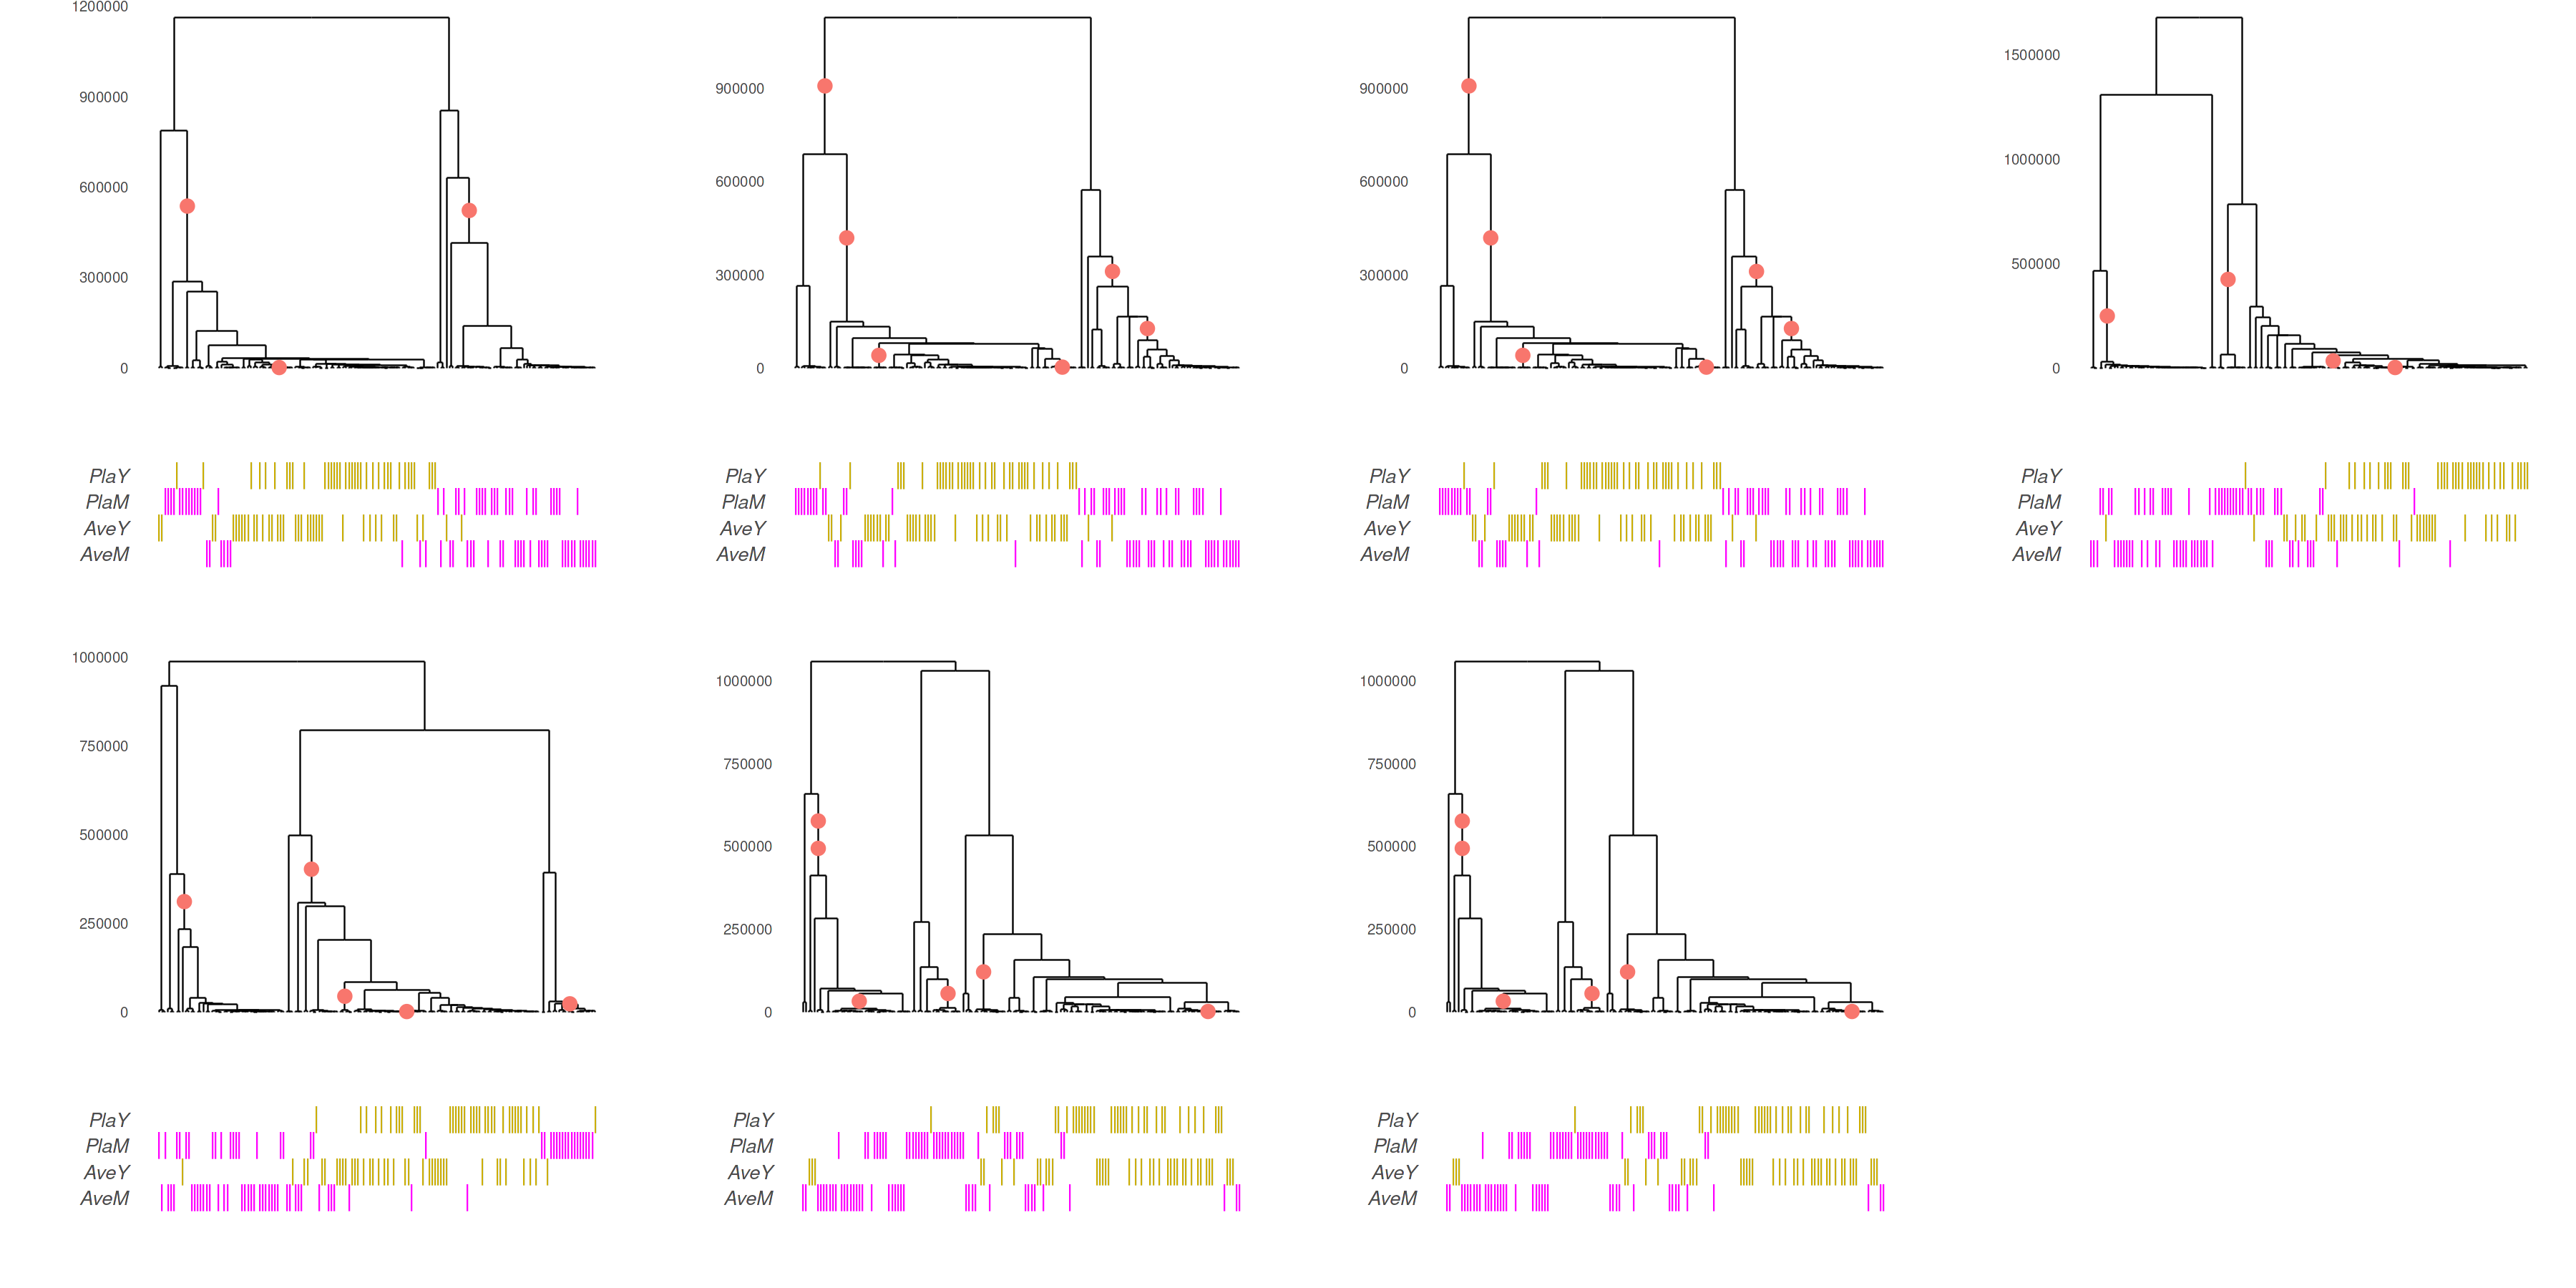

In [145]:
options(repr.plot.width=30, repr.plot.height=15)
pltList = rosList
plot_grid(pltList[[1]], pltList[[2]], pltList[[3]], pltList[[4]], pltList[[5]], pltList[[6]], pltList[[7]], nrow=2)

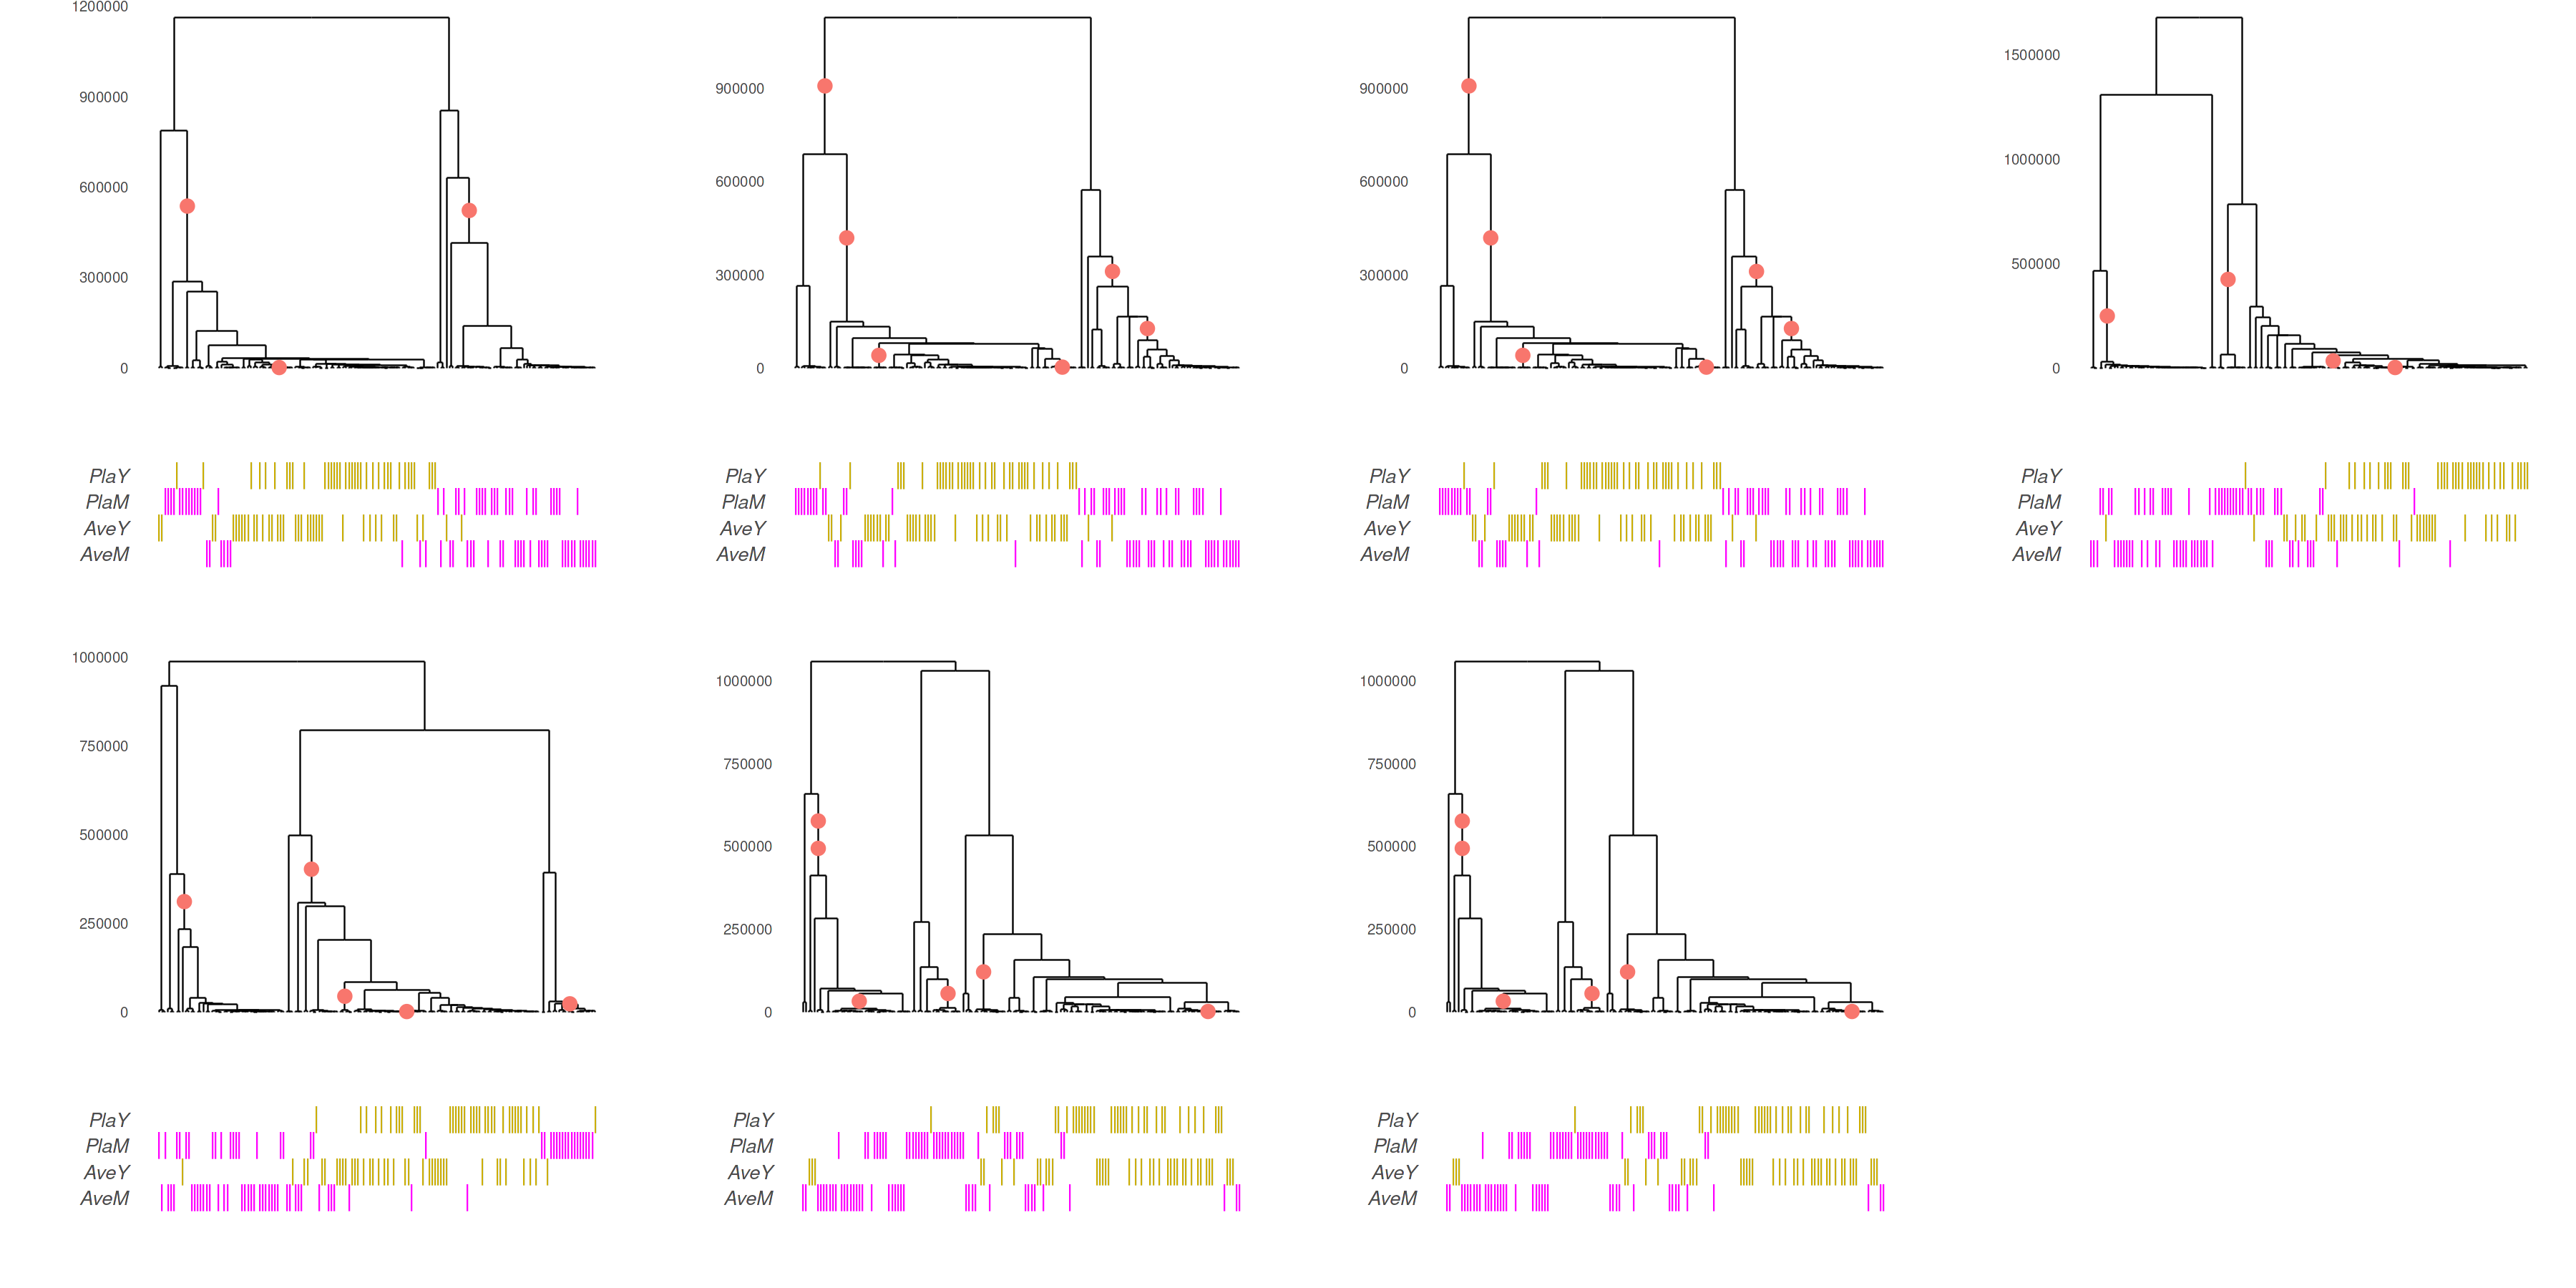

In [5]:
options(repr.plot.width=30, repr.plot.height=15)
pltList = rosList
plot_grid(pltList[[1]], pltList[[2]], pltList[[3]], pltList[[4]], pltList[[5]], pltList[[6]], pltList[[7]], nrow=2)

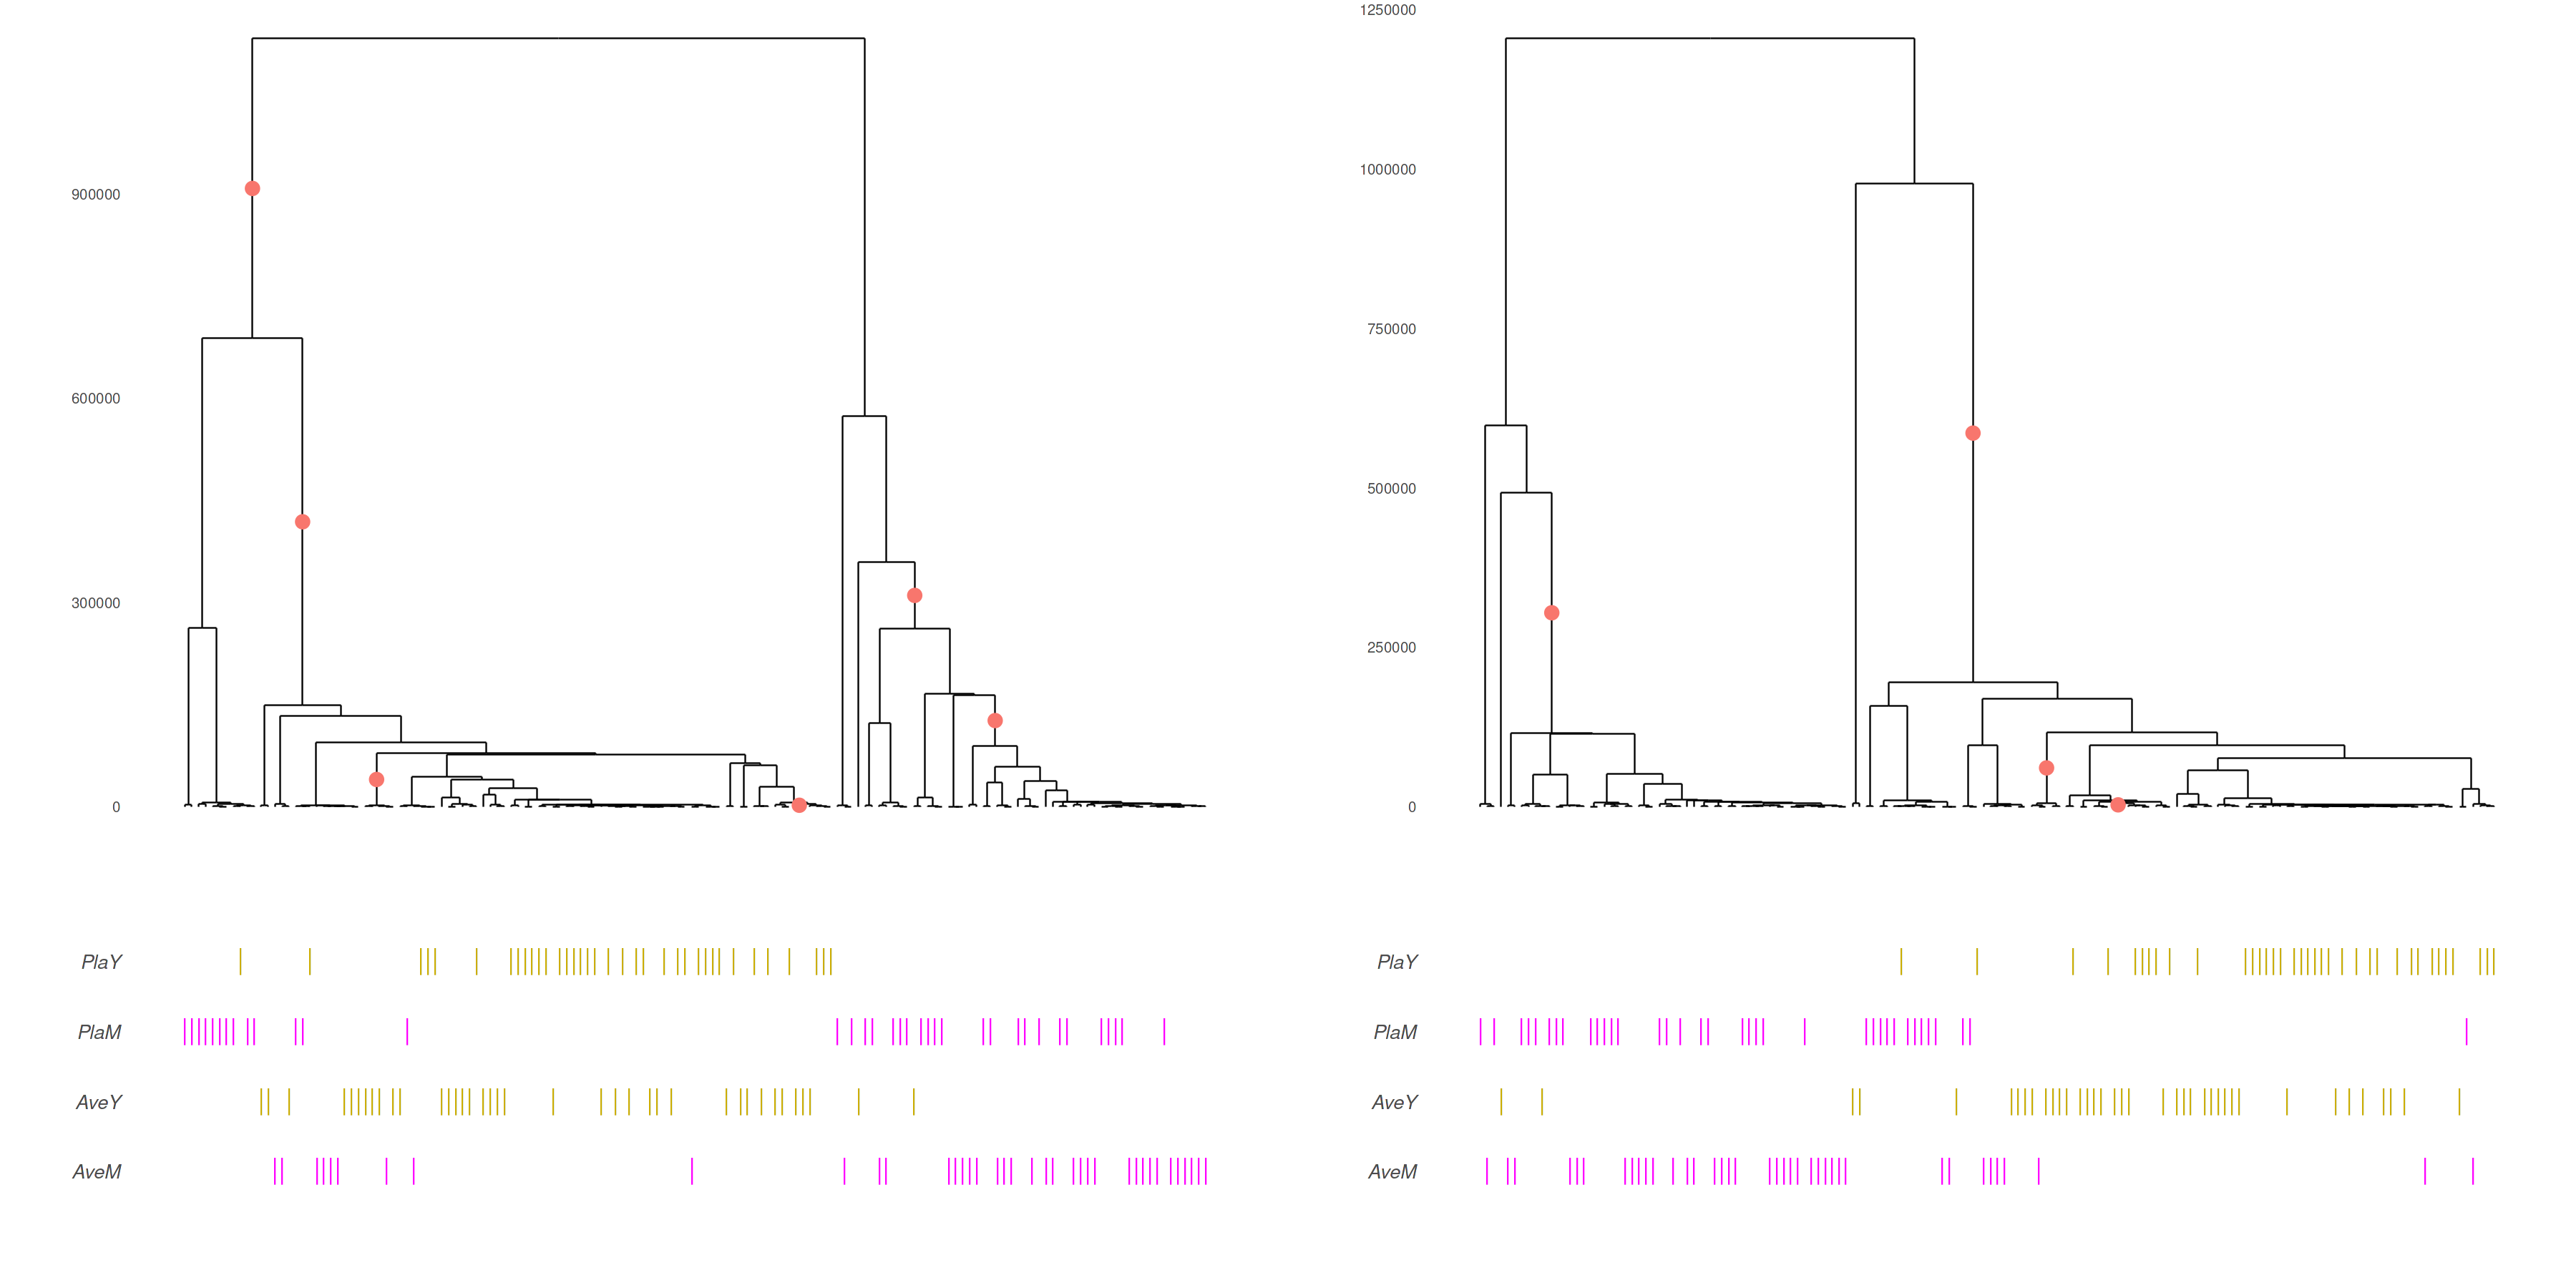

In [147]:
plot_grid(rosList[[2]], rosList_check[[1]])

In [73]:
## Tip colors ----
tip.colors = c(rep('magenta',38), rep('yellow3',38), rep('pink3',36), rep('orange',36))
ids = 0:147
tipInfo = data.frame(IDs = ids, tipColors = tip.colors)
tipInfo
## --

IDs,tipColors
<int>,<chr>
0,magenta
1,magenta
2,magenta
3,magenta
4,magenta
5,magenta
6,magenta
7,magenta
8,magenta


In [104]:
### treeid = 513856

In [135]:
geneName = 'ros' 
PATH_TO_RELATE = '~/_softwares/relate_v1.2.2'
filename_haps = './Chr6/Chr6.haps.gz'
filename_sample = './Chr6/Chr6.sample'
filename_poplabels = './AvePla.MY.n74.poplabels'
filename_anc = './Chr6/rel_chr6_joint.anc.gz'
filename_mut = './Chr6/rel_chr6_joint.mut.gz'
years_per_gen = 3
# snpPos = c(52884457, 52884489, 52884528, 52884553, 52884570, 52884624, 52884770)
treeIDs = 513856
filename_plot = paste('./treeViews/chr6_',geneName,'/chr6_trID',treeID,'_start',start,'_end',end,'_',geneName, sep='')
filename_plot

[1] "./treeViews/chr6_ros/chr6_trID513861_start52884667_end52884761_ros"

In [136]:
dat6[treeID == treeIDs]

treeID,topo1,topo2,topo3,start,end,total,wt1,wt2,wt3,mid,sites,wt1.smooth,wt2.smooth,wt3.smooth
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
513856,811,8465,724,52884471,52884507,10000,0.0811,0.8465,0.0724,52884489,1,0.1680954,0.6751202,0.1567844


In [106]:
## PopLabels
plotcoords <- read.table(paste(filename_plot,".plotcoords", sep = ""), header = T)
poplabels  <- read.table(filename_poplabels, header = T)[,2:4]

In [107]:
# plotcoords
# poplabels

In [108]:
tips <- subset(plotcoords, seg_type == "t")
# tips

In [109]:
if(all(is.na(poplabels[,3])) || any(poplabels[,3] != 1)){
    tips <- cbind(tips, population = poplabels[ceiling((tips$branchID+1)/2),1], region = poplabels[ceiling((tips$branchID+1)/2),2])
} else {
    tips <- cbind(tips, population = poplabels[tips$branchID+1,1], region = poplabels[tips$branchID+1,2])
}

In [110]:
unique_region <- unique(poplabels[,2])
# unique_region

In [111]:
tips$color = tipInfo[match(as.integer(tips$branchID), tipInfo$IDs), "tipColors"]

In [112]:
tree_lwd=0.5
axis_textsize=15
mut_size=5
shape='|'
poplabels_shapesize=8
poplabels_textsize=20
ratio=c(10,4)
p1 = TreeView(filename_plot, years_per_gen, lwd = tree_lwd, axis_textsize) + 
            AddMutations(filename_plot, filename_mut, years_per_gen, size = mut_size) #+ 
            #scale_y_continuous(trans = "log10")

In [113]:
shape='|'
p2 = ggplot(tips) + 
    geom_text(aes(x = x_begin, y = 0, label = branchID, color=color), angle=90, size=5) +
    labs(y = 'Tips') +
    scale_color_identity() +
    theme(text = element_text(face='italic', size=poplabels_textsize),
          axis.line=element_blank(), 
          axis.text.x=element_blank(),
          # axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          axis.title.x=element_blank(),
          # axis.title.y=element_blank(),legend.position="bottom",
          panel.background=element_blank(),panel.border=element_blank(),panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),plot.background=element_blank(), 
          strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
          strip.text = element_text(face="bold"), plot.margin = margin(t = 0, r = 20, b = 60, l = 60, unit = "pt"))

In [114]:
p3 <- PopLabels(filename_plot, filename_poplabels, 
                    shape, poplabels_shapesize, poplabels_textsize)

In [129]:
options(repr.plot.height=10, repr.plot.width=30)
rosTr2 = plot_grid(p1, p2, p3, rel_heights = c(10,2,4), labels = "", align = "v", ncol = 1)

In [116]:
### treeid = 513857

In [137]:
geneName = 'ros' 
PATH_TO_RELATE = '~/_softwares/relate_v1.2.2'
filename_haps = './Chr6/Chr6.haps.gz'
filename_sample = './Chr6/Chr6.sample'
filename_poplabels = './AvePla.MY.n74.poplabels'
filename_anc = './Chr6/rel_chr6_joint.anc.gz'
filename_mut = './Chr6/rel_chr6_joint.mut.gz'
years_per_gen = 3
# snpPos = c(52884457, 52884489, 52884528, 52884553, 52884570, 52884624, 52884770)
treeIDs = 513857
filename_plot = paste('./treeViews/chr6_',geneName,'/chr6_trID',treeID,'_start',start,'_end',end,'_',geneName, sep='')
filename_plot

[1] "./treeViews/chr6_ros/chr6_trID513861_start52884667_end52884761_ros"

In [138]:
dat6[treeID == treeIDs]

treeID,topo1,topo2,topo3,start,end,total,wt1,wt2,wt3,mid,sites,wt1.smooth,wt2.smooth,wt3.smooth
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
513857,733,8613,654,52884508,52884547,10000,0.0733,0.8613,0.0654,52884528,2,0.1677126,0.6759475,0.1563399


In [119]:
## PopLabels
plotcoords <- read.table(paste(filename_plot,".plotcoords", sep = ""), header = T)
poplabels  <- read.table(filename_poplabels, header = T)[,2:4]

In [120]:
# plotcoords
# poplabels

In [121]:
tips <- subset(plotcoords, seg_type == "t")
# tips

In [122]:
if(all(is.na(poplabels[,3])) || any(poplabels[,3] != 1)){
    tips <- cbind(tips, population = poplabels[ceiling((tips$branchID+1)/2),1], region = poplabels[ceiling((tips$branchID+1)/2),2])
} else {
    tips <- cbind(tips, population = poplabels[tips$branchID+1,1], region = poplabels[tips$branchID+1,2])
}

In [123]:
unique_region <- unique(poplabels[,2])
# unique_region

In [124]:
tips$color = tipInfo[match(as.integer(tips$branchID), tipInfo$IDs), "tipColors"]

In [125]:
tree_lwd=0.5
axis_textsize=15
mut_size=5
shape='|'
poplabels_shapesize=8
poplabels_textsize=20
ratio=c(10,4)
p1 = TreeView(filename_plot, years_per_gen, lwd = tree_lwd, axis_textsize) + 
            AddMutations(filename_plot, filename_mut, years_per_gen, size = mut_size) #+ 
            #scale_y_continuous(trans = "log10")

In [126]:
shape='|'
p2 = ggplot(tips) + 
    geom_text(aes(x = x_begin, y = 0, label = branchID, color=color), angle=90, size=5) +
    labs(y = 'Tips') +
    scale_color_identity() +
    theme(text = element_text(face='italic', size=poplabels_textsize),
          axis.line=element_blank(), 
          axis.text.x=element_blank(),
          # axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          axis.title.x=element_blank(),
          # axis.title.y=element_blank(),legend.position="bottom",
          panel.background=element_blank(),panel.border=element_blank(),panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),plot.background=element_blank(), 
          strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
          strip.text = element_text(face="bold"), plot.margin = margin(t = 0, r = 20, b = 60, l = 60, unit = "pt"))

In [127]:
p3 <- PopLabels(filename_plot, filename_poplabels, 
                    shape, poplabels_shapesize, poplabels_textsize)

In [130]:
options(repr.plot.height=10, repr.plot.width=30)
rosTr3 = plot_grid(p1, p2, p3, rel_heights = c(10,2,4), labels = "", align = "v", ncol = 1)

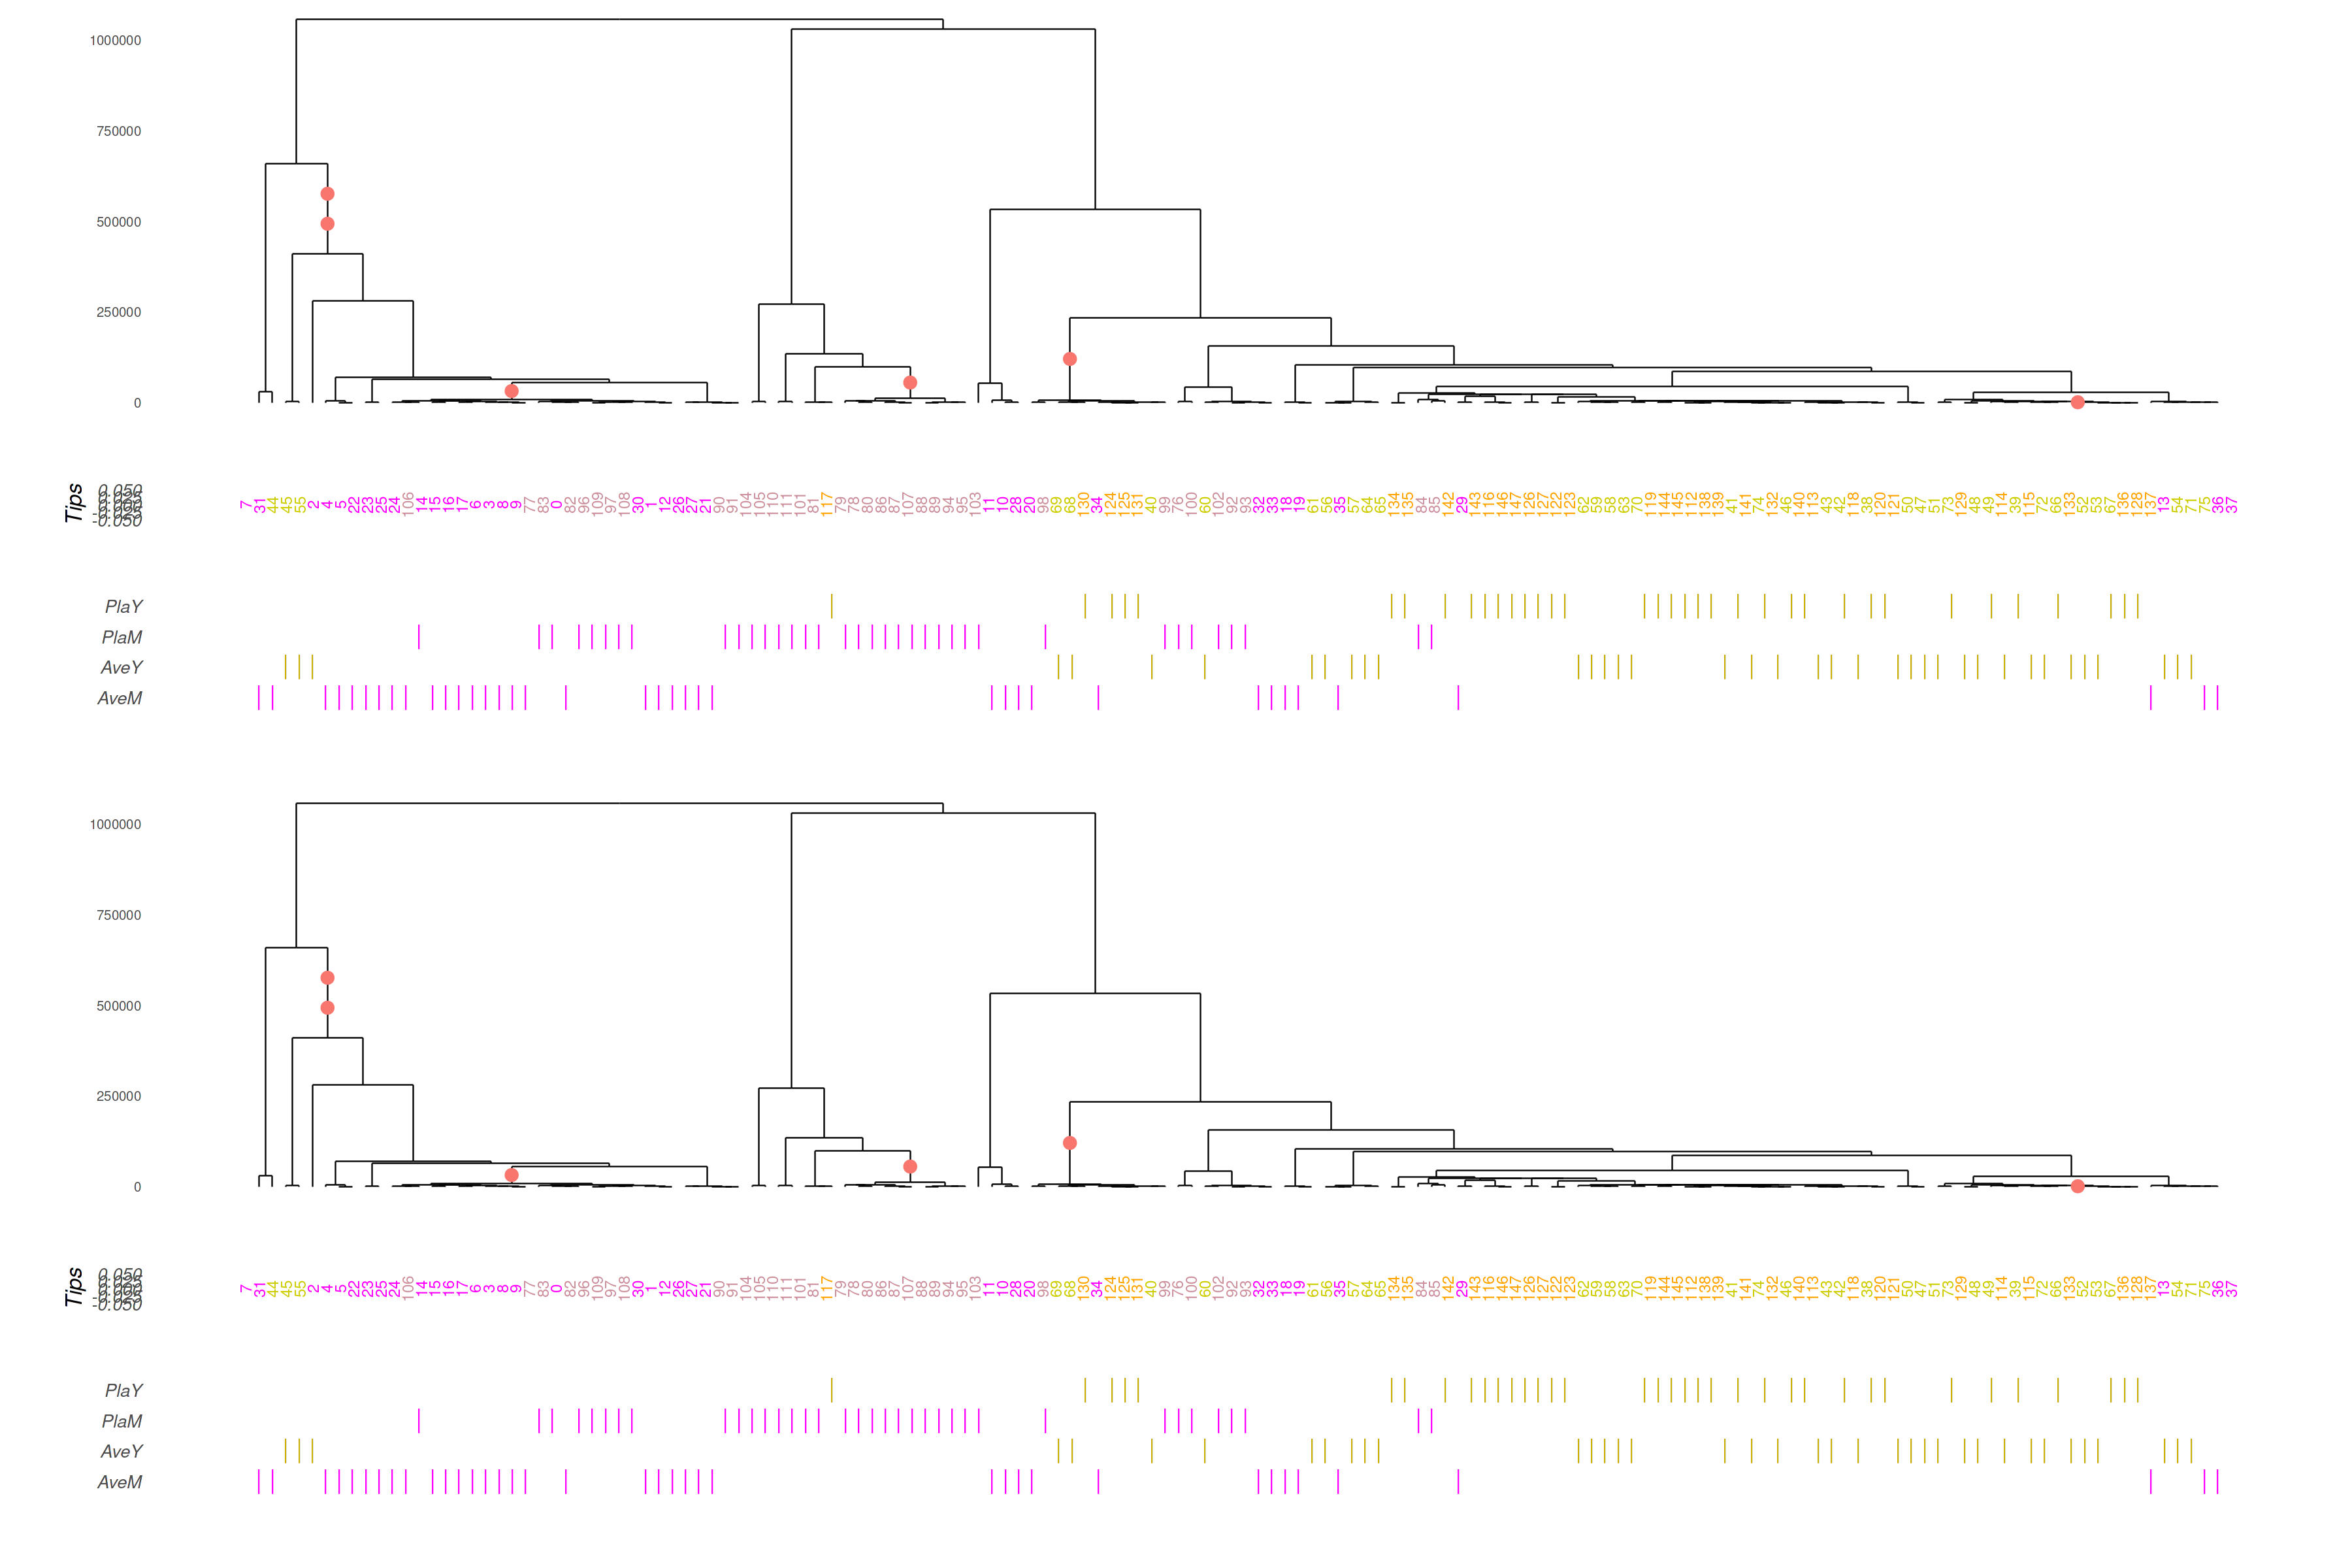

In [133]:
options(repr.plot.height=20, repr.plot.width=30)
plot_grid(rosTr2, rosTr3, ncol=1)

## Draw regions and trees for Flavia & Ros

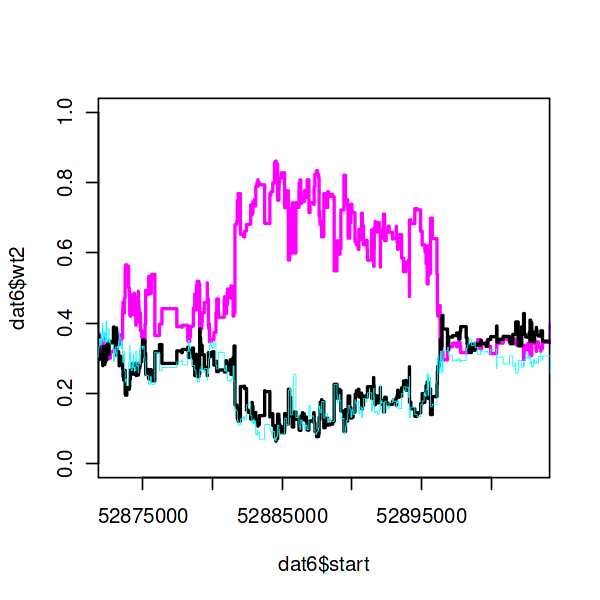

In [17]:
## Zoomed into Ros1

options(repr.plot.height = 5, repr.plot.width = 5)
# ros1 = c(52880000, 52920000)
ros1 = c(52873000, 52903000)

## Raw weights
plot(dat6$start, dat6$wt2, xlim=ros1, ylim=c(0,1), type='s', col='magenta', lwd=2)
lines(dat6$start, dat6$wt1, col=alpha('black',1), lwd=2, type='s')
lines(dat6$start, dat6$wt3, col=alpha('cyan',1), lwd=0.5, type='s')

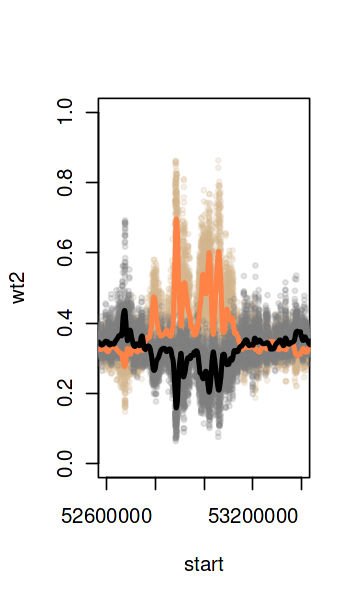

In [18]:
## Entire RosEl region

options(repr.plot.height = 5, repr.plot.width = 3)
# ros1 = c(52880000, 52920000)
ros1 = c(52.6e6, 53.4e6)

# Raw weights
plot(wt2~start, dat6, xlim=ros1, ylim=c(0,1), type='p', col=alpha('tan',0.2), cex=0.7, pch=20)
points(wt1~start, dat6, col=alpha('grey50',0.2), cex=0.7, pch=20)
# Smooth weights
lines(wt2.smooth~start, dat6, type='s', col='sienna1', lwd=3)
lines(wt1.smooth~start, dat6, type='s', col='black', lwd=3)

In [211]:
## Trees
dat6[treeID %in% 513856:513860,-16]

treeID,topo1,topo2,topo3,start,end,total,wt1,wt2,wt3,mid,sites,wt1.smooth,wt2.smooth,wt3.smooth
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
513856,811,8465,724,52884471,52884507,10000,0.0811,0.8465,0.0724,52884489,1,0.1680954,0.6751202,0.1567844
513857,733,8613,654,52884508,52884547,10000,0.0733,0.8613,0.0654,52884528,2,0.1677126,0.6759475,0.1563399
513858,639,8617,744,52884548,52884558,10000,0.0639,0.8617,0.0744,52884553,1,0.1674623,0.6764888,0.1560489
513859,707,8585,708,52884559,52884580,10000,0.0707,0.8585,0.0708,52884570,1,0.1673017,0.6768362,0.1558621
513860,710,8530,760,52884581,52884666,10000,0.0710,0.8530,0.0760,52884624,1,0.1667843,0.6779568,0.1552589


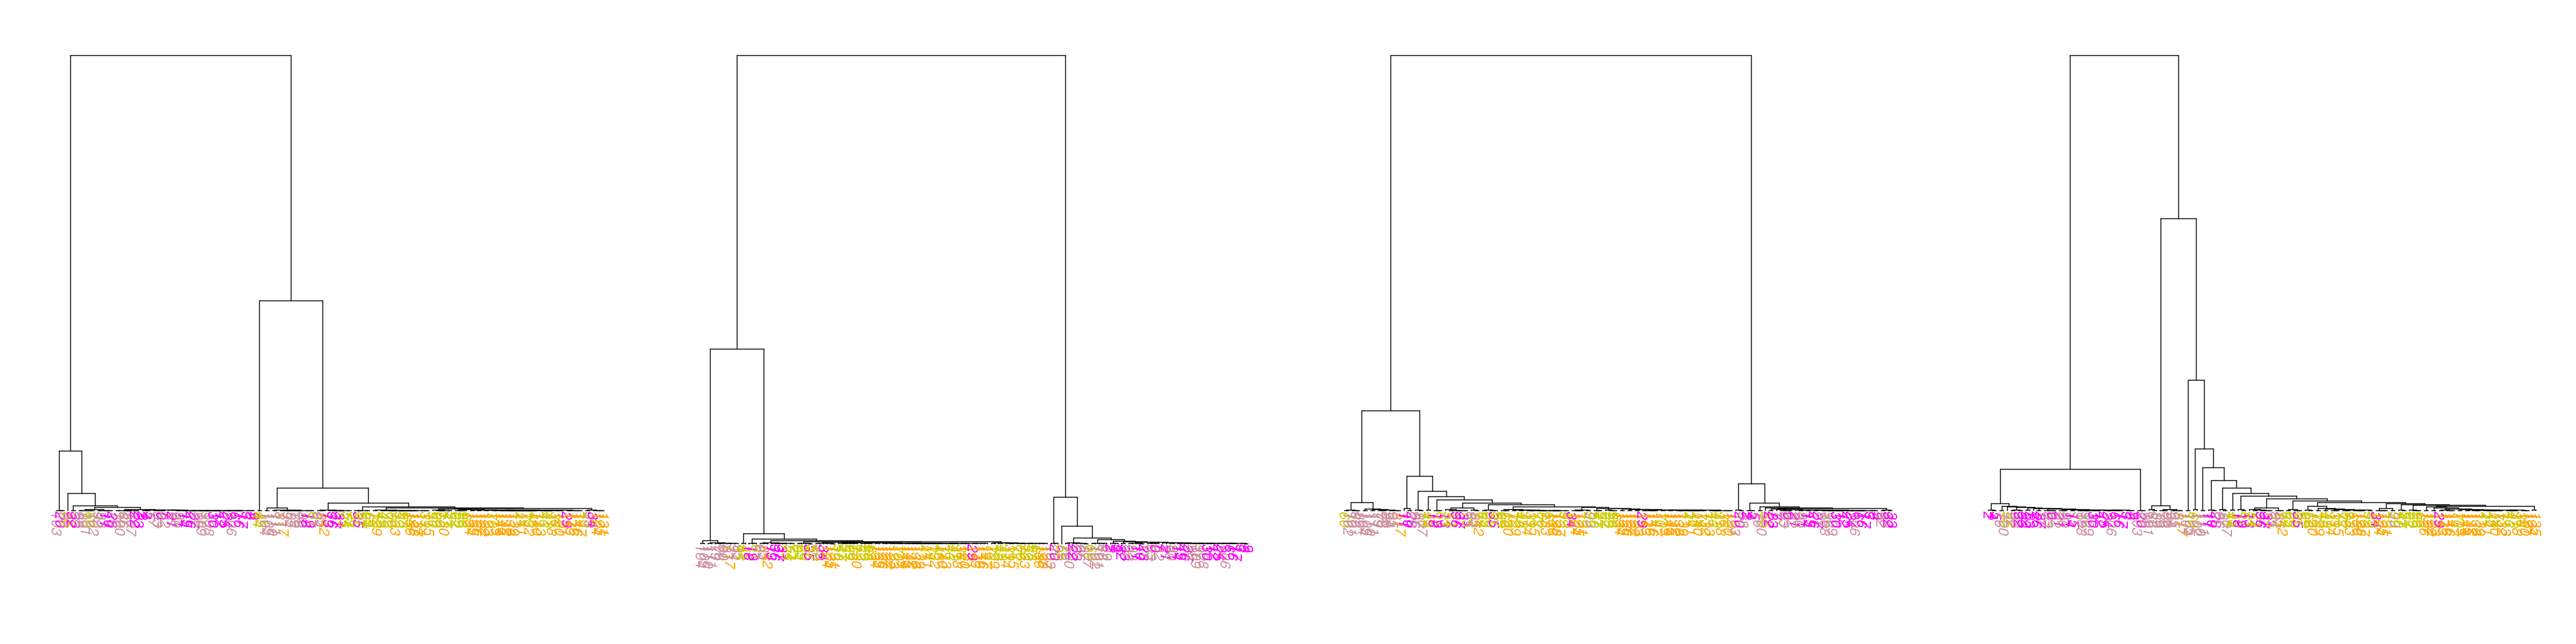

In [217]:
options(repr.plot.width=40, repr.plot.height=10)
par(mfrow=c(1,4))
rosTr1 = read.tree(text = as.character(dat6[513856,16]))
tr=rosTr1; plot.phylo(tr, tip.color = tipInfo[match(as.integer(tr$tip.label), tipInfo$IDs), "tipColors"], cex=2, direction='down')

rosTr2 = read.tree(text = as.character(dat6[513857,16]))
tr=rosTr2; plot.phylo(tr, tip.color = tipInfo[match(as.integer(tr$tip.label), tipInfo$IDs), "tipColors"], cex=2, direction='down')

rosTr3 = read.tree(text = as.character(dat6[513858,16]))
tr=rosTr3; plot.phylo(tr, tip.color = tipInfo[match(as.integer(tr$tip.label), tipInfo$IDs), "tipColors"], cex=2, direction='down')

rosTr4 = read.tree(text = as.character(dat6[513859,16]))
tr=rosTr4; plot.phylo(tr, tip.color = tipInfo[match(as.integer(tr$tip.label), tipInfo$IDs), "tipColors"], cex=2, direction='down')

In [5]:
flavia = c(53.1e6, 53.9e6)

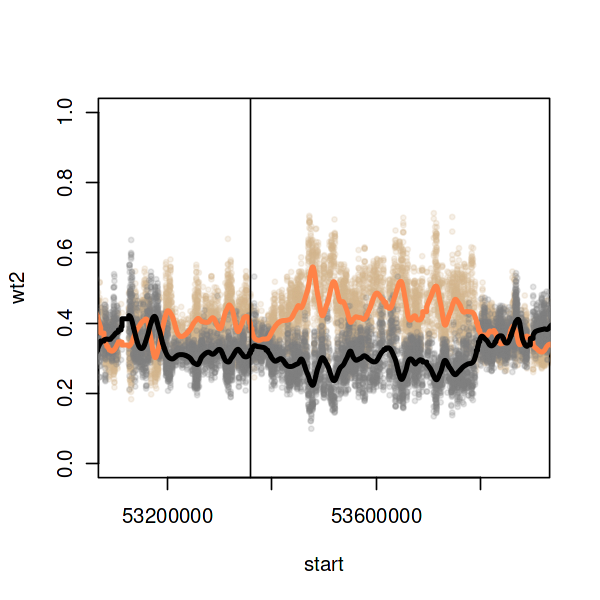

In [17]:
options(repr.plot.height = 5, repr.plot.width = 5)
# flavia = c(53368062, 53569435)
flavia = c(53.1e6, 53.9e6)

# Raw weights
plot(wt2~start, dat2, xlim=flavia, ylim=c(0,1), type='p', col=alpha('magenta',0.2), cex=0.7, pch=20)
points(wt1~start, dat2, col=alpha('grey50',0.2), cex=0.7, pch=20)
# Smooth weights
lines(wt2.smooth~start, dat2, type='s', col='sienna1', lwd=3)
lines(wt1.smooth~start, dat2, type='s', col='black', lwd=3)
abline(v=53.36e6)

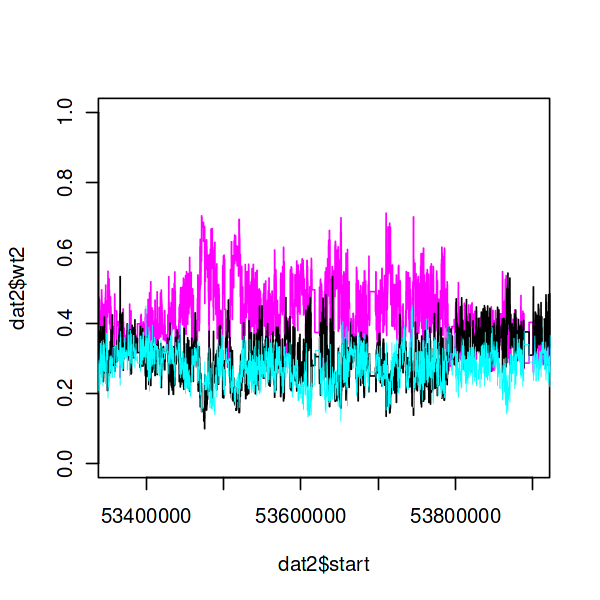

In [16]:
# Raw weights
options(repr.plot.height = 5, repr.plot.width = 5)

# plot(wt2~start, dat2, xlim=c(53.36e6,flavia[2]), ylim=c(0,1), type='s', col=alpha('magenta',1), cex=0.7, pch=20)
# lines(wt1~start, dat2, col=alpha('black',1), cex=0.7, pch=20)
# lines(wt3~start, dat2, col=alpha('cyan',1), cex=0.7, pch=20)

## Raw weights
plot(dat2$start, dat2$wt2, xlim=c(53.36e6,flavia[2]), ylim=c(0,1), type='s', col='magenta', lwd=1)
lines(dat2$start, dat2$wt1, col=alpha('black',1), lwd=1, type='s')
lines(dat2$start, dat2$wt3, col=alpha('cyan',1), lwd=0.5, type='s')

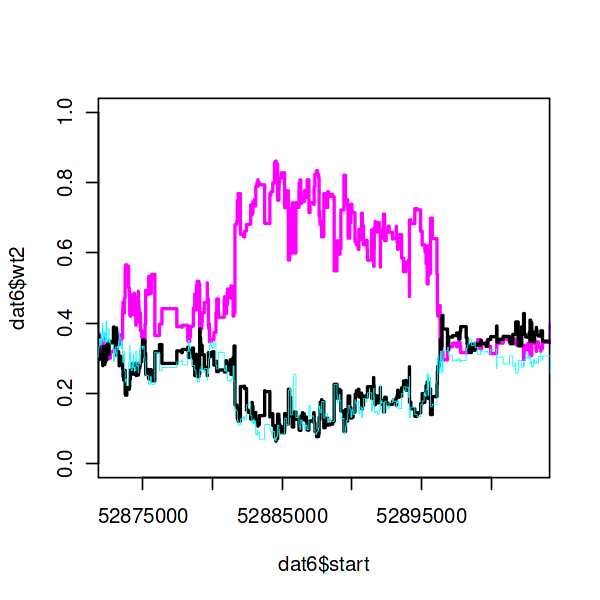

In [11]:
## Zoomed into Ros1

options(repr.plot.height = 5, repr.plot.width = 5)
# ros1 = c(52880000, 52920000)
ros1 = c(52873000, 52903000)

## Raw weights
plot(dat6$start, dat6$wt2, xlim=ros1, ylim=c(0,1), type='s', col='magenta', lwd=2)
lines(dat6$start, dat6$wt1, col=alpha('black',1), lwd=2, type='s')
lines(dat6$start, dat6$wt3, col=alpha('cyan',1), lwd=0.5, type='s')